In [2]:
from tools.propagate import assign_detectors_to_grid, create_detector_grid_map, create_inverted_detector_map, calculate_grid_centers, find_closest_detectors
from tools.geometry import generate_detector
import jax
import jax.numpy as jnp

jax.config.update('jax_platform_name', 'cpu')

In [3]:
json_filename = 'config/cyl_geom_config.json'
detector = generate_detector(json_filename)

detector_points = jnp.array(detector.all_points)
detector_radius = detector.S_radius

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# 
# def plot_detector_grid_and_3d(detector_grid_map, detector_points, r, h, n_radial, n_angular, n_height):
#     wall_data = detector_grid_map[:n_angular * n_height].reshape(n_angular, n_height)
#     cap_data = detector_grid_map[n_angular * n_height:].reshape(2, n_radial, n_angular)
# 
#     fig = plt.figure(figsize=(16, 16))
# 
#     # Plot wall
#     ax_wall = fig.add_subplot(2, 2, 1)
#     global_max = np.max(detector_grid_map)
#     extent = [0, 360, -h/2, h/2]
#     im1 = ax_wall.imshow(wall_data.T, aspect='auto', origin='lower', interpolation='nearest', extent=extent, vmin=0, vmax=global_max)
#     ax_wall.set_title('Wall')
#     ax_wall.set_xlabel('Angle (degrees)')
#     ax_wall.set_ylabel('Height')
#     plt.colorbar(im1, ax=ax_wall, label='Number of Detectors')
# 
#     angle_step = 360 / n_angular
#     height_step = h / n_height
# 
#     for angle in np.arange(0, 360 + angle_step, angle_step):
#         ax_wall.axvline(x=angle, color='b', linestyle='-', linewidth=0.5)
# 
#     for height in np.arange(-h/2, h/2 + height_step, height_step):
#         ax_wall.axhline(y=height, color='b', linestyle='-', linewidth=0.5)
# 
#     major_ticks = np.arange(0, 361, max(1, int(angle_step * 6)))
#     ax_wall.set_xticks(major_ticks)
#     ax_wall.set_xticklabels([f"{x}°" for x in major_ticks])
# 
#     # Adjust y-axis ticks and labels
#     y_ticks = np.linspace(-h/2, h/2, n_height + 1)
#     ax_wall.set_yticks(y_ticks)
#     ax_wall.set_yticklabels([f"{y:.2f}" for y in y_ticks])
# 
#     # Set y-axis limits explicitly
#     ax_wall.set_ylim(-h/2, h/2)
# 
#     # Plot top cap
#     ax_top = fig.add_subplot(2, 2, 2, projection='polar')
#     theta = np.linspace(0, 2*np.pi, n_angular, endpoint=False)
#     r_plot = np.linspace(0, r, n_radial)
#     T, R = np.meshgrid(theta, r_plot)
#     im2 = ax_top.pcolormesh(T, R, cap_data[0], cmap='viridis', vmin=0, vmax=global_max)
#     ax_top.set_title('Top Cap')
#     ax_top.set_theta_zero_location("N")
#     ax_top.set_theta_direction(-1)
#     ax_top.set_yticks([])  # Remove radial ticks
#     ax_top.set_yticklabels([])  # Remove radial labels
#     plt.colorbar(im2, ax=ax_top, label='Number of Detectors')
# 
#     # Plot bottom cap
#     ax_bottom = fig.add_subplot(2, 2, 3, projection='polar')
#     im3 = ax_bottom.pcolormesh(T, R, cap_data[1], cmap='viridis', vmin=0, vmax=global_max)
#     ax_bottom.set_title('Bottom Cap')
#     ax_bottom.set_theta_zero_location("N")
#     ax_bottom.set_theta_direction(-1)
#     ax_bottom.set_ylim(top=r)
#     ax_bottom.set_yticks([])  # Remove radial ticks
#     ax_bottom.set_yticklabels([])  # Remove radial labels
#     plt.colorbar(im3, ax=ax_bottom, label='Number of Detectors')
# 
#     # Create 3D plot
#     ax_3d = fig.add_subplot(2, 2, 4, projection='3d')
#     ax_3d.scatter(detector_points[:, 0], detector_points[:, 1], detector_points[:, 2],
#                   c=detector_points[:, 2], cmap='viridis', s=10)
# 
#     theta = np.linspace(0, 2*np.pi, 100)
#     z = np.linspace(-h/2, h/2, 50)
#     Theta, Z = np.meshgrid(theta, z)
#     X = r * np.cos(Theta)
#     Y = r * np.sin(Theta)
#     ax_3d.plot_surface(X, Y, Z, alpha=0.2)
# 
#     r_cap = np.linspace(0, r, 50)
#     theta_cap = np.linspace(0, 2*np.pi, 100)
#     R, Theta = np.meshgrid(r_cap, theta_cap)
#     X_cap = R * np.cos(Theta)
#     Y_cap = R * np.sin(Theta)
#     Z_top = np.full_like(X_cap, h/2)
#     Z_bottom = np.full_like(X_cap, -h/2)
#     ax_3d.plot_surface(X_cap, Y_cap, Z_top, alpha=0.2)
#     ax_3d.plot_surface(X_cap, Y_cap, Z_bottom, alpha=0.2)
# 
#     ax_3d.set_title('3D Detector Positions')
#     ax_3d.set_xlabel('X')
#     ax_3d.set_ylabel('Y')
#     ax_3d.set_zlabel('Z')
#     ax_3d.set_box_aspect((1, 1, h/r))
# 
#     fig.suptitle(f"pmt grid layout for {n_radial=}, {n_angular=}, {n_height=}", fontsize=20)
# 
#     plt.tight_layout(rect=[0, 0.0, 1, 0.98])
#     plt.show()
# 
# # Example usage
# r, h = 4.0, 6.0
# n_radial, n_angular, n_height = 20, 40, 18
# 
# 
# assignments = assign_detectors_to_grid(detector_points, detector_radius, r, h, n_radial, n_angular, n_height)
# detector_grid_map = create_detector_grid_map(assignments, n_radial, n_angular, n_height)
# 
# # Assuming you have detector_grid_map and detector_points from previous computations
# plot_detector_grid_and_3d(detector_grid_map, detector_points, r, h, n_radial, n_angular, n_height)

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# 
# def plot_detector_grid(detector_grid_map, r, h, n_radial, n_angular, n_height):
#     wall_data = detector_grid_map[:n_angular * n_height].reshape(n_angular, n_height)
#     cap_data = detector_grid_map[n_angular * n_height:].reshape(2, n_radial, n_angular)
# 
#     fig = plt.figure(figsize=(16, 16))
# 
#     # Create a grid for subplots with adjusted ratios
#     gs = fig.add_gridspec(2, 3, height_ratios=[1.1, 1], width_ratios=[1, 1, 0.05])
# 
#     # Plot wall (top subplot)
#     ax_wall = fig.add_subplot(gs[0, :2])
#     global_max = np.max(detector_grid_map)
#     extent = [0, 360, -h/2, h/2]
#     im1 = ax_wall.imshow(wall_data.T, aspect='auto', origin='lower', interpolation='nearest', 
#                          extent=extent, vmin=0, vmax=global_max, cmap='viridis')
#     ax_wall.set_title('Wall')
#     ax_wall.set_xlabel('Angle (degrees)')
#     ax_wall.set_ylabel('Height')
# 
#     angle_step = 360 / n_angular
#     height_step = h / n_height
# 
#     for angle in np.arange(0, 360 + angle_step, angle_step):
#         ax_wall.axvline(x=angle, color='b', linestyle='-', linewidth=0.5)
# 
#     for height in np.arange(-h/2, h/2 + height_step, height_step):
#         ax_wall.axhline(y=height, color='b', linestyle='-', linewidth=0.5)
# 
#     major_ticks = np.arange(0, 361, max(1, int(angle_step * 6)))
#     ax_wall.set_xticks(major_ticks)
#     ax_wall.set_xticklabels([f"{x}°" for x in major_ticks])
# 
#     y_ticks = np.linspace(-h/2, h/2, n_height + 1)
#     ax_wall.set_yticks(y_ticks)
#     ax_wall.set_yticklabels([f"{y:.2f}" for y in y_ticks])
# 
#     ax_wall.set_ylim(-h/2, h/2)
# 
#     # Plot top cap (bottom left subplot)
#     ax_top = fig.add_subplot(gs[1, 0], projection='polar')
#     theta = np.linspace(0, 2*np.pi, n_angular, endpoint=False)
#     r_plot = np.linspace(0, r, n_radial)
#     T, R = np.meshgrid(theta, r_plot)
#     im2 = ax_top.pcolormesh(T, R, cap_data[0], cmap='viridis', vmin=0, vmax=global_max)
#     ax_top.set_title('Top Cap')
#     ax_top.set_theta_zero_location("N")
#     ax_top.set_theta_direction(-1)
#     ax_top.set_yticks([])
#     ax_top.set_yticklabels([])
# 
#     # Plot bottom cap (bottom right subplot)
#     ax_bottom = fig.add_subplot(gs[1, 1], projection='polar')
#     theta = np.linspace(0, 2*np.pi, n_angular, endpoint=False)
#     r_plot = np.linspace(0, r, n_radial)
#     T, R = np.meshgrid(theta, r_plot)
#     im2 = ax_bottom.pcolormesh(T, R, cap_data[1], cmap='viridis', vmin=0, vmax=global_max)
#     ax_bottom.set_title('Bottom Cap')
#     ax_bottom.set_theta_zero_location("N")
#     ax_bottom.set_theta_direction(-1)
#     ax_bottom.set_yticks([])
#     ax_bottom.set_yticklabels([])
# 
#     # Add a single colorbar on the right
#     cax = fig.add_subplot(gs[:, -1])
#     cbar = plt.colorbar(im1, cax=cax, label='Number of Detectors')
#     
#     # Set integer ticks on the colorbar
#     cbar.set_ticks(np.arange(0, global_max + 1, max(1, int(global_max / 10))))
#     cbar.set_ticklabels([str(int(tick)) for tick in cbar.get_ticks()])
# 
#     fig.suptitle(f"PMT grid layout for {n_radial=}, {n_angular=}, {n_height=}", fontsize=20)
# 
#     plt.tight_layout(rect=[0, 0.0, 1, 0.98])
#     plt.show()
# 
# # Example usage
# r, h = 4.0, 6.0
# n_radial, n_angular, n_height = 20, 40, 18
# 
# # Assuming you have detector_grid_map from previous computations
# plot_detector_grid(detector_grid_map, r, h, n_radial, n_angular, n_height)

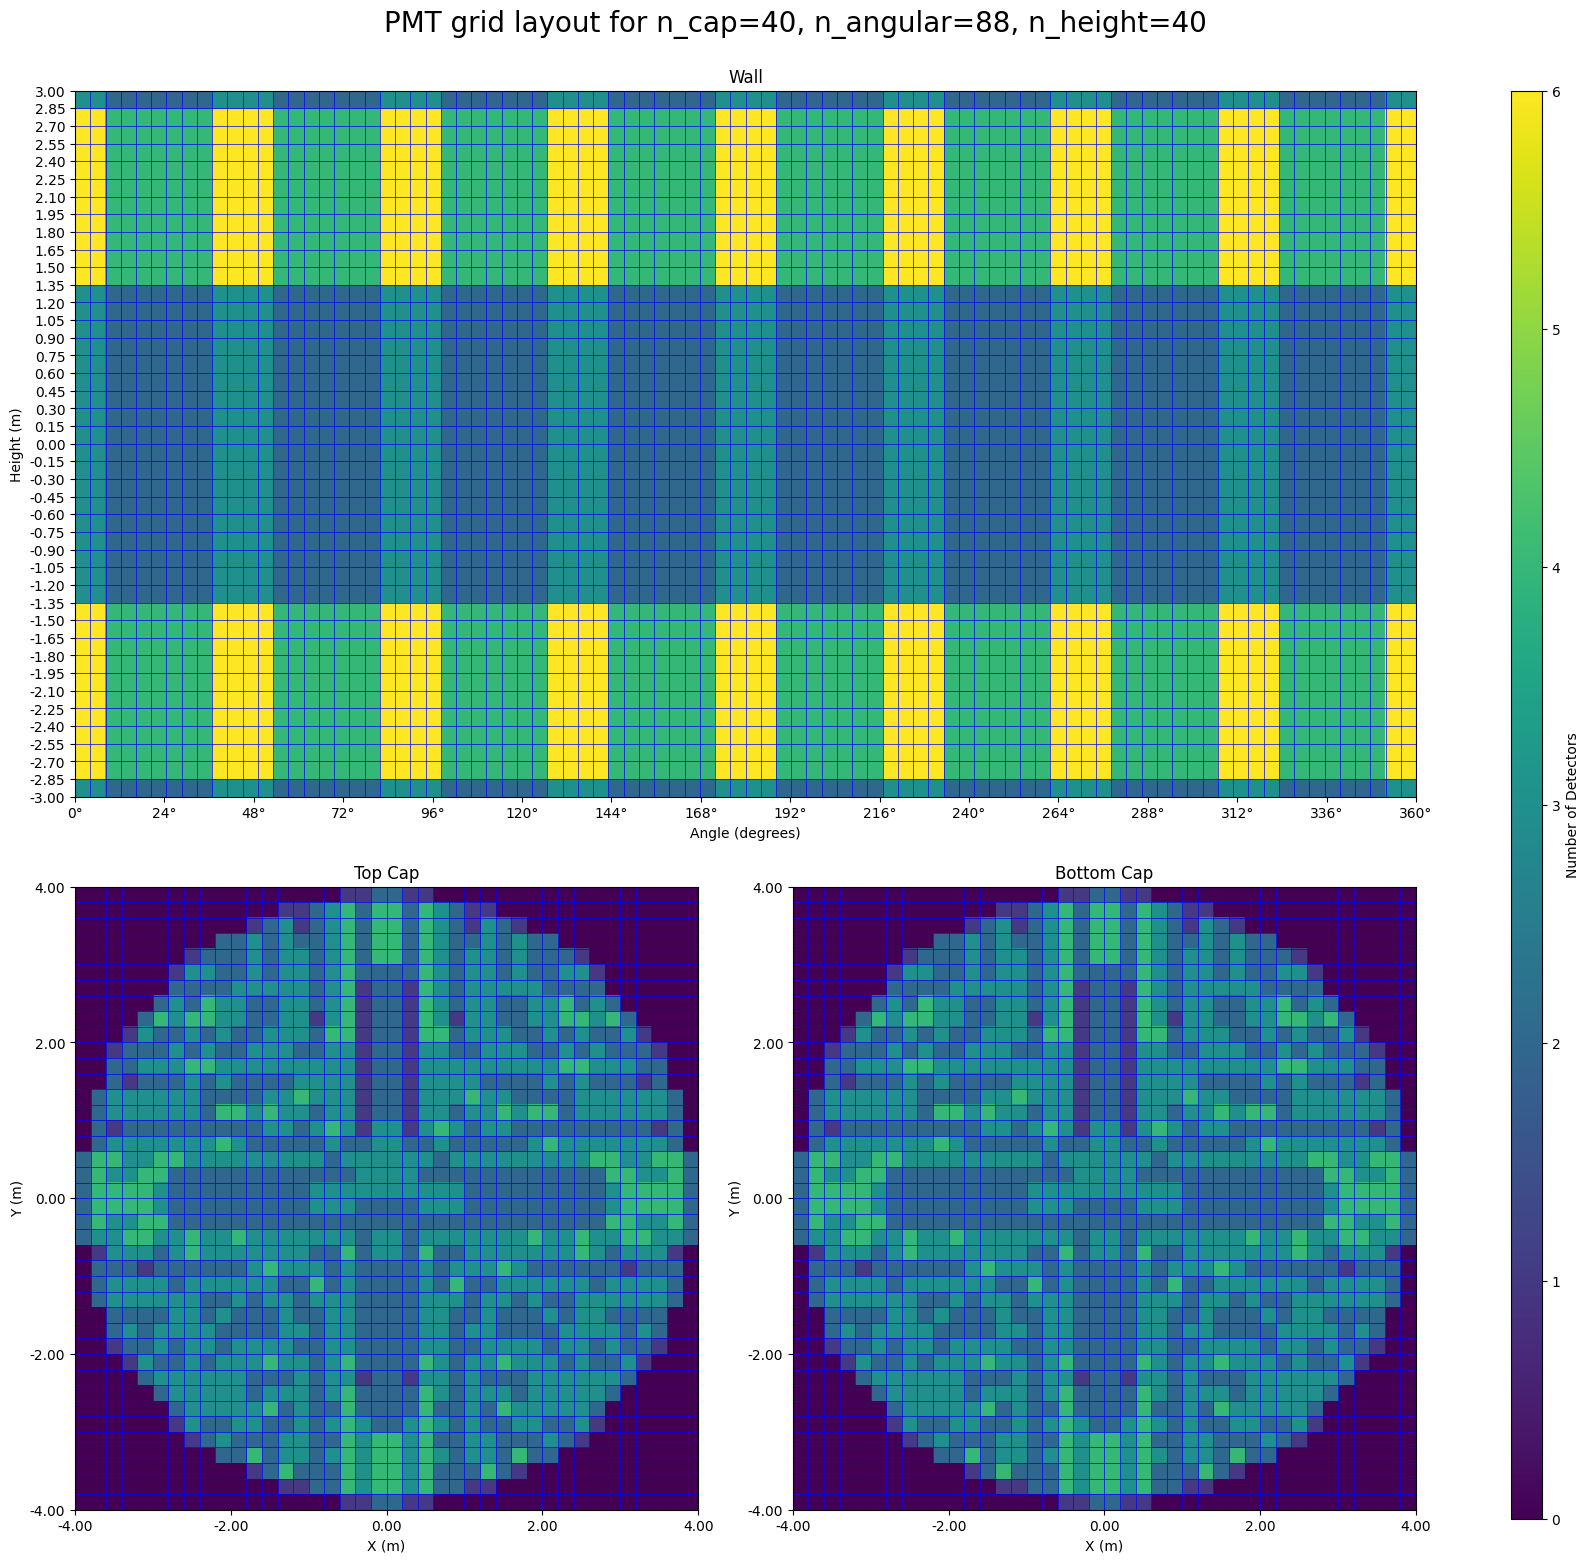

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_detector_grid(detector_grid_map, r, h, n_cap, n_angular, n_height):
    wall_data = detector_grid_map[:n_angular * n_height].reshape(n_angular, n_height)
    cap_data = detector_grid_map[n_angular * n_height:].reshape(2, n_cap, n_cap)

    fig = plt.figure(figsize=(16, 16))

    # Create a grid for subplots with adjusted ratios
    gs = fig.add_gridspec(2, 3, height_ratios=[1.1, 1], width_ratios=[1, 1, 0.05])

    # Plot wall (top subplot)
    ax_wall = fig.add_subplot(gs[0, :2])
    global_max = np.max(detector_grid_map)
    extent = [0, 360, -h/2, h/2]
    im1 = ax_wall.imshow(wall_data.T, aspect='auto', origin='lower', interpolation='nearest', 
                         extent=extent, vmin=0, vmax=global_max, cmap='viridis')
    ax_wall.set_title('Wall')
    ax_wall.set_xlabel('Angle (degrees)')
    ax_wall.set_ylabel('Height (m)')

    angle_step = 360 / n_angular
    height_step = h / n_height

    for angle in np.arange(0, 360 + angle_step, angle_step):
        ax_wall.axvline(x=angle, color='b', linestyle='-', linewidth=0.5)

    for height in np.arange(-h/2, h/2 + height_step, height_step):
        ax_wall.axhline(y=height, color='b', linestyle='-', linewidth=0.5)

    major_ticks = np.arange(0, 361, max(1, int(angle_step * 6)))
    ax_wall.set_xticks(major_ticks)
    ax_wall.set_xticklabels([f"{x}°" for x in major_ticks])

    y_ticks = np.linspace(-h/2, h/2, n_height + 1)
    ax_wall.set_yticks(y_ticks)
    ax_wall.set_yticklabels([f"{y:.2f}" for y in y_ticks])

    ax_wall.set_ylim(-h/2, h/2)

    # Function to format cap plots
    def format_cap_plot(ax, data, title):
        im = ax.imshow(data, cmap='viridis', vmin=0, vmax=global_max, origin='lower', extent=[-r, r, -r, r])
        ax.set_title(title)
        ax.set_xlabel('X (m)')
        ax.set_ylabel('Y (m)')
        
        # Add grid lines
        grid_step = 2 * r / n_cap
        for i in range(n_cap + 1):
            ax.axhline(y=-r + i * grid_step, color='b', linestyle='-', linewidth=0.5)
            ax.axvline(x=-r + i * grid_step, color='b', linestyle='-', linewidth=0.5)
        
        # Set ticks
        ticks = np.linspace(-r, r, 5)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.set_xticklabels([f"{x:.2f}" for x in ticks])
        ax.set_yticklabels([f"{y:.2f}" for y in ticks])
        
        return im

    # Plot top cap (bottom left subplot)
    ax_top = fig.add_subplot(gs[1, 0])
    im2 = format_cap_plot(ax_top, cap_data[0], 'Top Cap')

    # Plot bottom cap (bottom right subplot)
    ax_bottom = fig.add_subplot(gs[1, 1])
    im3 = format_cap_plot(ax_bottom, cap_data[1], 'Bottom Cap')

    # Add a single colorbar on the right
    cax = fig.add_subplot(gs[:, -1])
    cbar = plt.colorbar(im1, cax=cax, label='Number of Detectors')
    
    # Set integer ticks on the colorbar
    cbar.set_ticks(np.arange(0, global_max + 1, max(1, int(global_max / 10))))
    cbar.set_ticklabels([str(int(tick)) for tick in cbar.get_ticks()])

    fig.suptitle(f"PMT grid layout for {n_cap=}, {n_angular=}, {n_height=}", fontsize=20)

    plt.tight_layout(rect=[0, 0.0, 1, 0.98])
    plt.show()

# Example usage
r, h = 4.0, 6.0
n_cap, n_angular, n_height = 40, 88, 40

assignments = assign_detectors_to_grid(detector_points, detector_radius, r, h, n_cap, n_angular, n_height)
detector_grid_map = create_detector_grid_map(assignments, n_cap, n_angular, n_height)

# Assuming you have detector_grid_map from previous computations
plot_detector_grid(detector_grid_map, r, h, n_cap, n_angular, n_height)

In [7]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.patches import Circle, Rectangle, Wedge
# import jax.numpy as jnp
# 
# def visualize_detector_grid(assignments, detector_points, detector_radius, r, h, n_radial, n_angular, n_height):
#     def get_adjacent_cells(cell):
#         i, j, k = cell
#         adjacent = []
#         if k == 0:  # Wall
#             for di in [-1, 0, 1]:
#                 for dj in [-1, 0, 1]:
#                     adjacent.append(((i + di) % n_angular, (j + dj) % n_height, 0))
#         else:  # Cap
#             for di in [-1, 0, 1]:
#                 for dj in [-1, 0, 1]:
#                     adjacent.append(((i + di) % n_radial, (j + dj) % n_angular, k))
#         return adjacent
# 
#     # Choose a random cell
#     k = np.random.choice([0, 1, 2])  # 0: Wall, 1: Top cap, 2: Bottom cap
#     if k == 0:
#         i, j = np.random.randint(0, n_angular), np.random.randint(0, n_height)
#     else:
#         i, j = np.random.randint(0, n_radial), np.random.randint(0, n_angular)
#     center_cell = (i, j, k)
# 
#     # Get adjacent cells
#     cells_to_plot = [center_cell] + get_adjacent_cells(center_cell)
# 
#     # Set up the plot
#     fig, ax = plt.subplots(figsize=(12, 12))
# 
#     # Plot the grid
#     if k == 0:  # Wall
#         ax.set_xlim(0, 2 * np.pi)
#         ax.set_ylim(-h/2, h/2)
#         for angle in np.linspace(0, 2*np.pi, n_angular+1):
#             ax.axvline(angle, color='gray', linestyle='--', alpha=0.5)
#         for height in np.linspace(-h/2, h/2, n_height+1):
#             ax.axhline(height, color='gray', linestyle='--', alpha=0.5)
#         
#         # Shade the selected cell and its neighbors
#         cell_width = 2 * np.pi / n_angular
#         cell_height = h / n_height
#         for cell in cells_to_plot:
#             color = 'yellow' if cell == center_cell else 'lightblue'
#             rect = Rectangle((cell[0] * cell_width, -h/2 + cell[1] * cell_height), 
#                              cell_width, cell_height, 
#                              facecolor=color, edgecolor='none', alpha=0.3)
#             ax.add_patch(rect)
#     else:  # Cap
#         ax.set_xlim(-r, r)
#         ax.set_ylim(-r, r)
#         for radius in np.linspace(0, r, n_radial+1):
#             circle = plt.Circle((0, 0), radius, fill=False, color='gray', linestyle='--', alpha=0.5)
#             ax.add_artist(circle)
#         for angle in np.linspace(0, 2*np.pi, n_angular+1):
#             x = [0, r * np.cos(angle)]
#             y = [0, r * np.sin(angle)]
#             ax.plot(x, y, color='gray', linestyle='--', alpha=0.5)
#         
#         # Shade the selected cell and its neighbors
#         cell_radial_width = r / n_radial
#         cell_angular_width = 2 * np.pi / n_angular
#         for cell in cells_to_plot:
#             color = 'yellow' if cell == center_cell else 'lightblue'
#             inner_radius = cell[0] * cell_radial_width
#             outer_radius = (cell[0] + 1) * cell_radial_width
#             start_angle = cell[1] * cell_angular_width * 180 / np.pi
#             end_angle = (cell[1] + 1) * cell_angular_width * 180 / np.pi
#             wedge = Wedge((0, 0), outer_radius, start_angle, end_angle, 
#                           width=outer_radius-inner_radius, 
#                           facecolor=color, edgecolor='none', alpha=0.3)
#             ax.add_patch(wedge)
# 
#     # Plot detectors
#     red_count, blue_count, gray_count = 0, 0, 0
#     for idx, detector in enumerate(detector_points):
#         if k == 0:  # Wall
#             x = np.arctan2(detector[1], detector[0]) % (2 * np.pi)
#             y = detector[2]
#         else:  # Cap
#             x, y = detector[0], detector[1]
# 
#         detector_cells = assignments[idx]
#         
#         # Check if any of the detector's assigned cells match the center or adjacent cells
#         if any(tuple(cell) == center_cell for cell in detector_cells if not np.all(cell == -1)):
#             color = 'red'
#             red_count += 1
#         # elif any(tuple(cell) in cells_to_plot for cell in detector_cells if not np.all(cell == -1)):
#         #     color = 'blue'
#         #     blue_count += 1
#         else:
#             color = 'gray'
#             gray_count += 1
#         
#         circle = Circle((x, y), detector_radius, fill=True, alpha=0.5, color=color)
#         ax.add_artist(circle)
# 
#     print(f"Red detectors: {red_count}")
#     print(f"Blue detectors: {blue_count}")
#     print(f"Gray detectors: {gray_count}")
# 
#     # Set labels and title
#     ax.set_aspect('equal')
#     ax.set_title(f"Detector Grid Visualization (Cell: {center_cell})")
#     if k == 0:
#         ax.set_xlabel("Angle")
#         ax.set_ylabel("Height")
#     else:
#         ax.set_xlabel("X")
#         ax.set_ylabel("Y")
# 
#     plt.show()
# 
# # Example usage:
# visualize_detector_grid(assignments, detector_points, detector_radius, r, h, n_radial, n_angular, n_height)
# visualize_detector_grid(assignments, detector_points, detector_radius, r, h, n_radial, n_angular, n_height)
# visualize_detector_grid(assignments, detector_points, detector_radius, r, h, n_radial, n_angular, n_height)

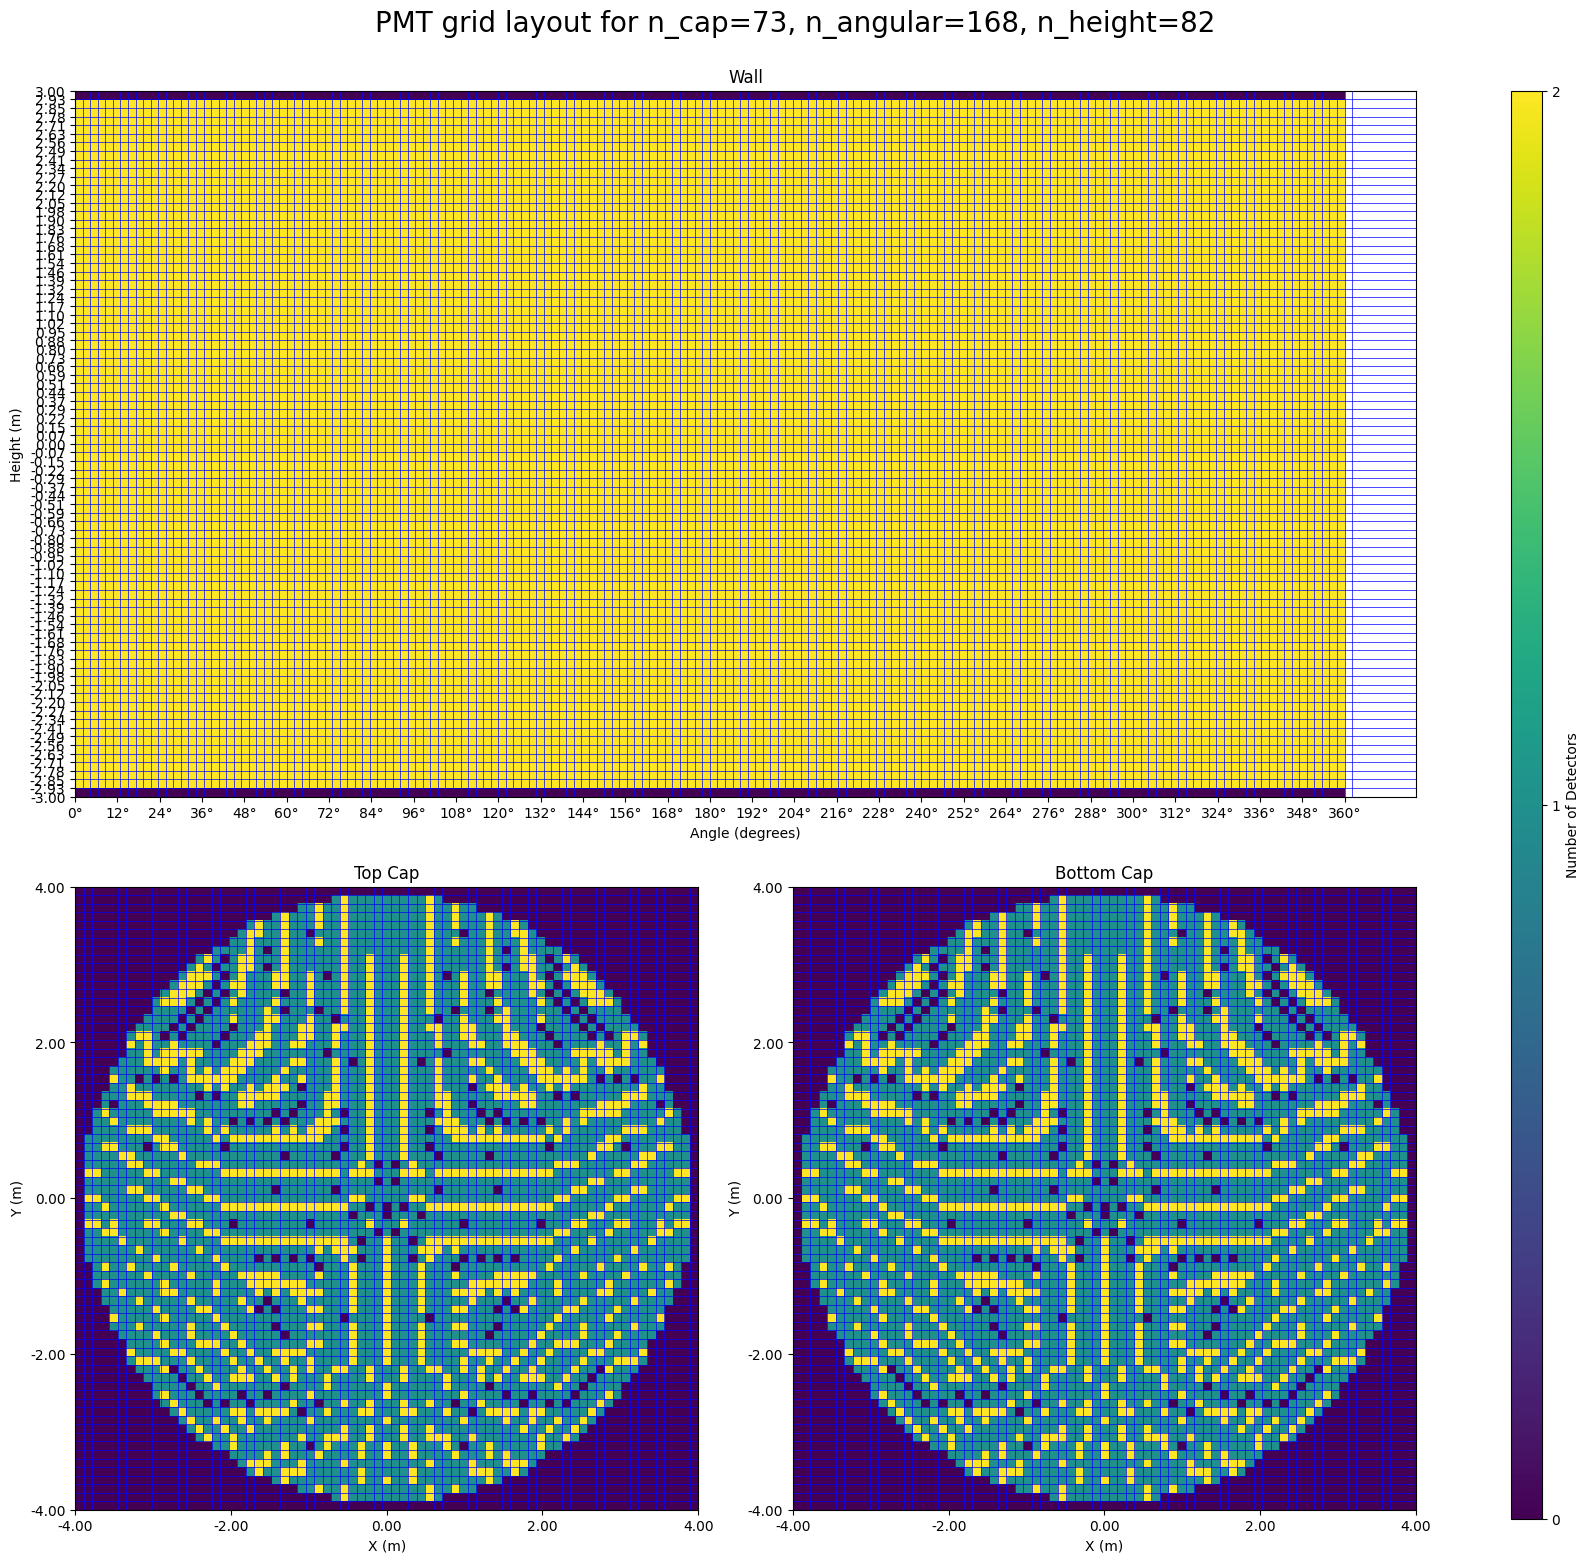

Red detectors: 1
Gray detectors: 1612


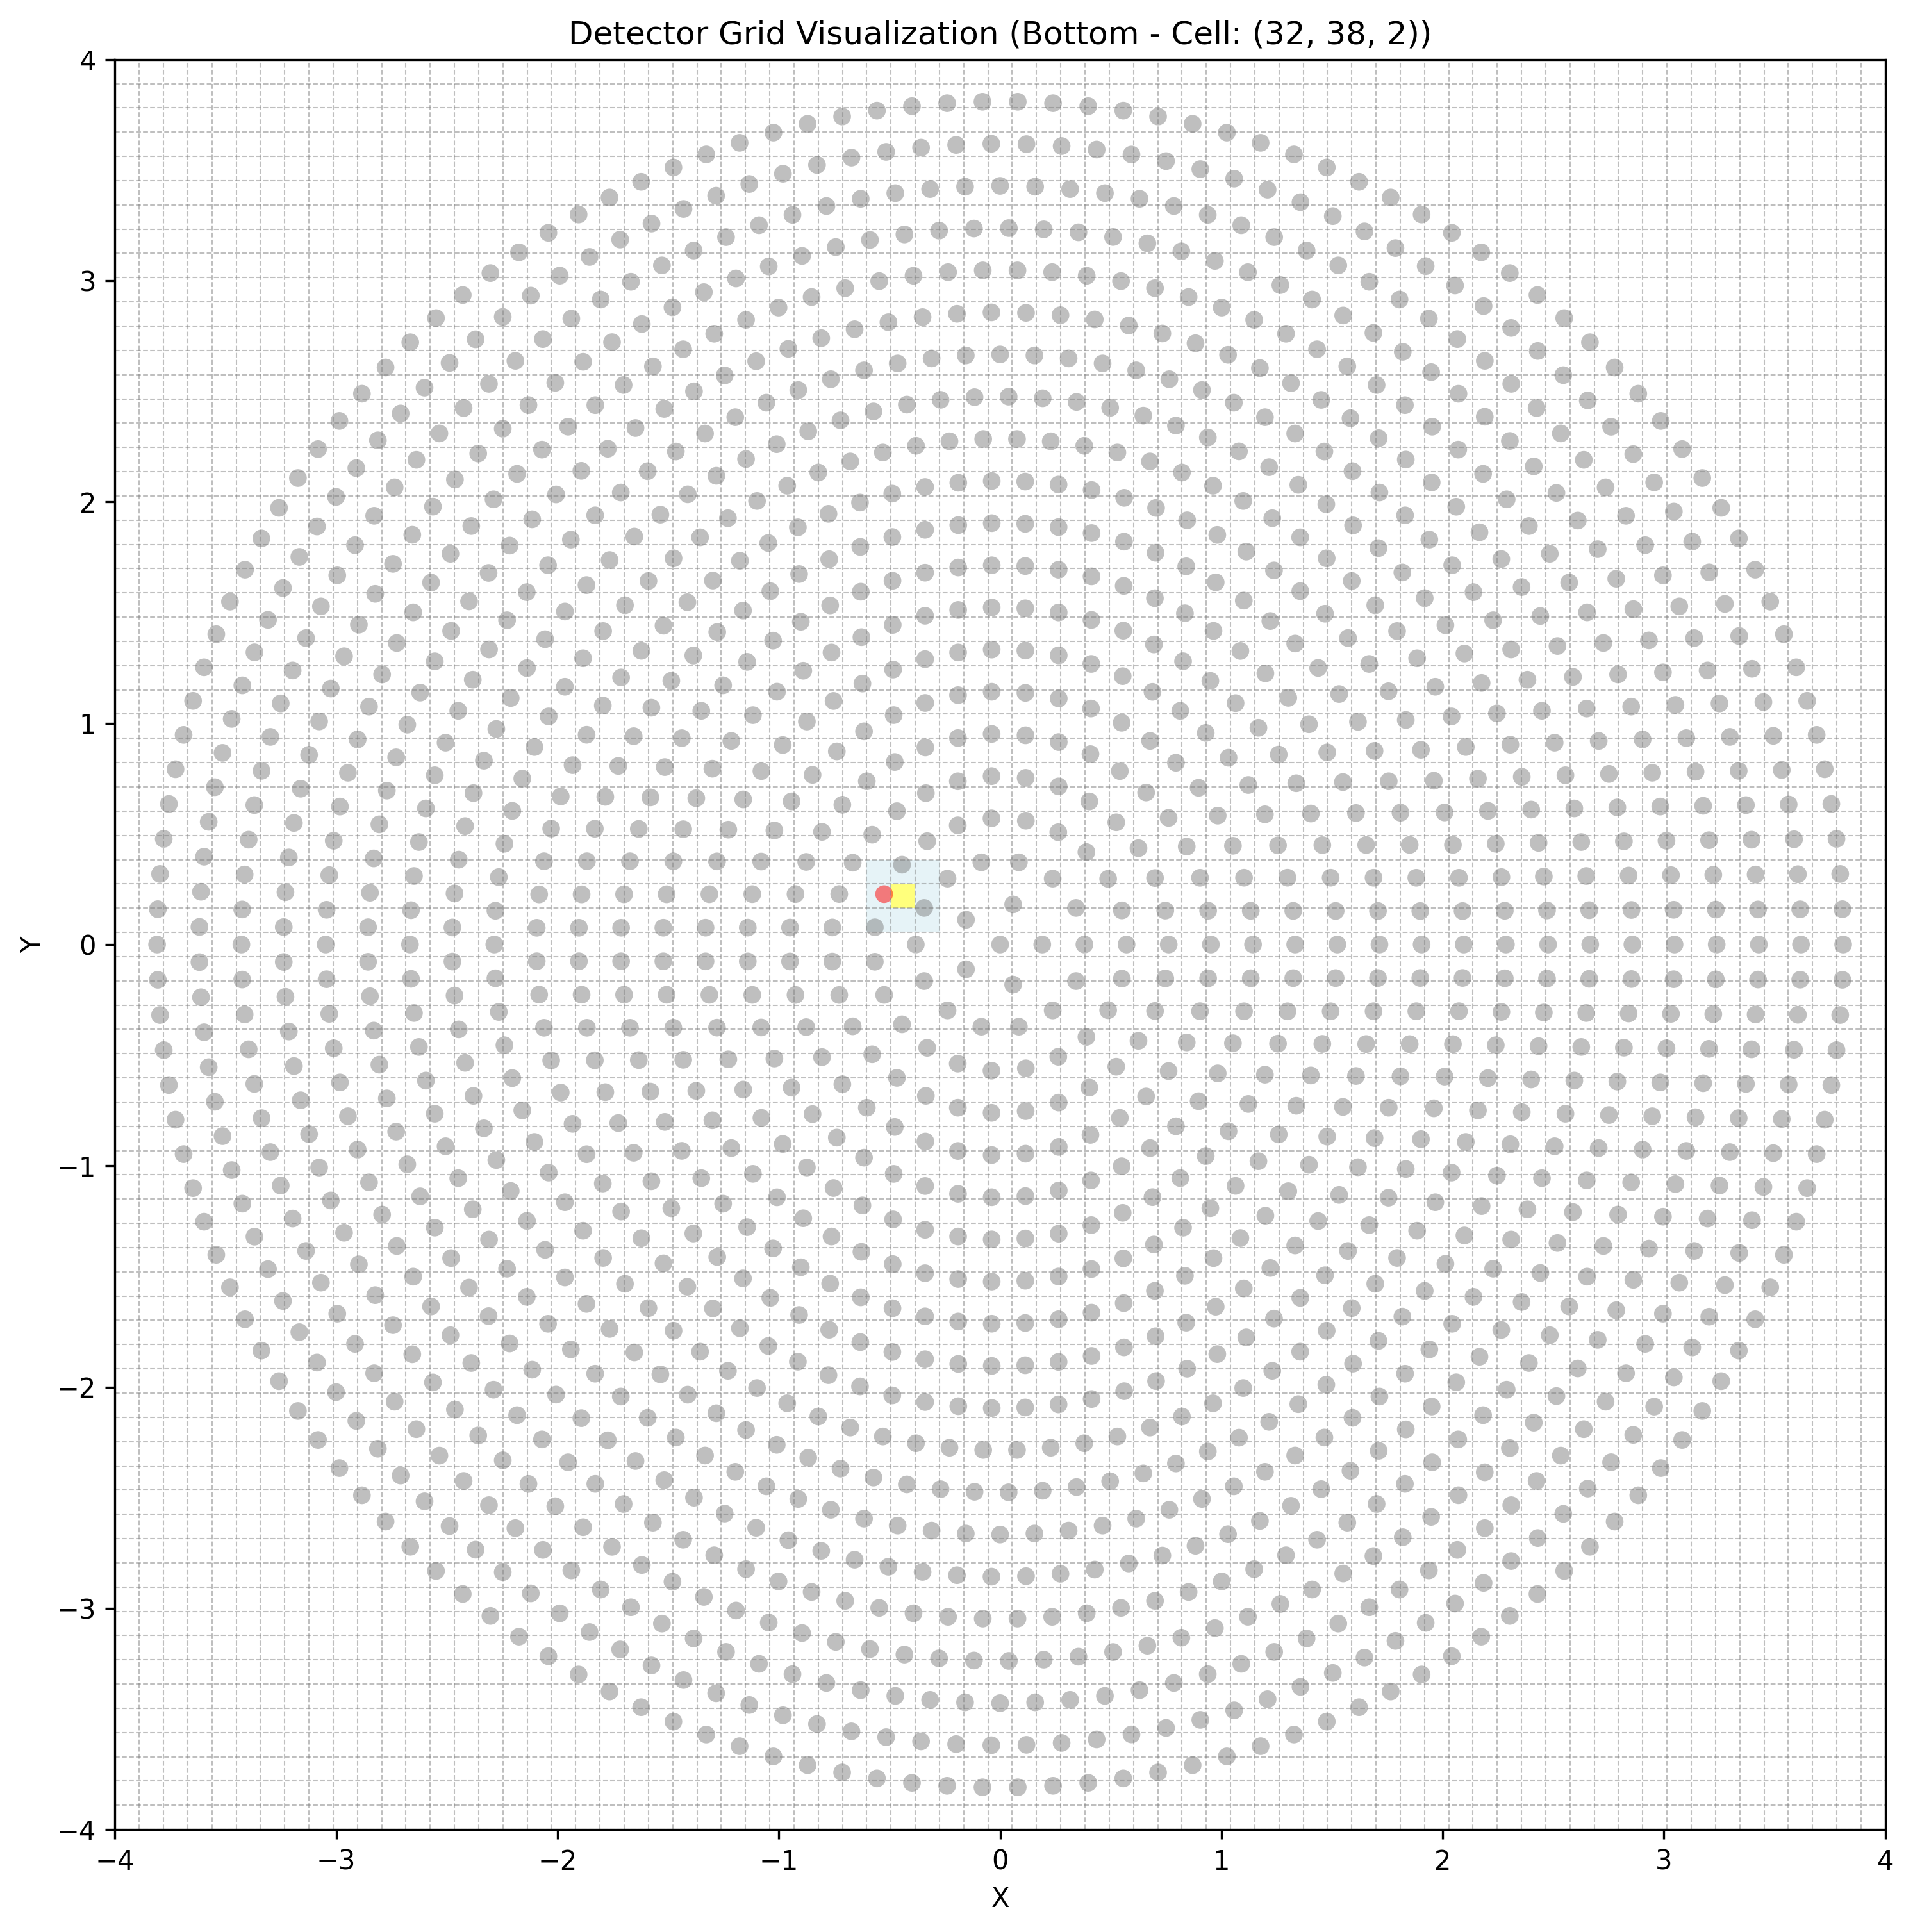

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from matplotlib.collections import PatchCollection
import jax.numpy as jnp

def visualize_detector_grid(assignments, detector_points, detector_radius, r, h, n_cap, n_angular, n_height, dpi=300):
    def get_adjacent_cells(cell):
        i, j, k = cell
        if k == 0:  # Wall
            return [((i + di) % n_angular, (j + dj) % n_height, 0) for di in [-1, 0, 1] for dj in [-1, 0, 1]]
        else:  # Cap
            return [((i + di) % n_cap, (j + dj) % n_cap, k) for di in [-1, 0, 1] for dj in [-1, 0, 1]]

    # Choose a random cell
    k = np.random.choice([0, 1, 2])  # 0: Wall, 1: Top cap, 2: Bottom cap
    i, j = np.random.randint(0, n_angular if k == 0 else n_cap), np.random.randint(0, n_height if k == 0 else n_cap)
    center_cell = (i, j, k)

    # Get adjacent cells
    cells_to_plot = [center_cell] + get_adjacent_cells(center_cell)

    # Set up the plot
    if k == 0:  # Wall
        circumference = 2 * np.pi * r
        aspect_ratio = circumference / h
        fig_width = min(20, max(10, 8 * aspect_ratio))  # Cap width between 10 and 20
        fig_height = fig_width / aspect_ratio
        fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)
        ax.set_xlim(0, circumference)
        ax.set_ylim(-h/2, h/2)
        
        # Draw grid lines
        ax.vlines(np.linspace(0, circumference, n_angular+1), -h/2, h/2, colors='gray', linestyles='--', alpha=0.5, linewidth=0.5)
        ax.hlines(np.linspace(-h/2, h/2, n_height+1), 0, circumference, colors='gray', linestyles='--', alpha=0.5, linewidth=0.5)
        
        # Shade cells
        cell_width, cell_height = circumference / n_angular, h / n_height
        rects = [Rectangle((cell[0] * cell_width, -h/2 + cell[1] * cell_height), 
                           cell_width, cell_height) for cell in cells_to_plot]
    else:  # Cap
        fig, ax = plt.subplots(figsize=(10, 10), dpi=dpi)
        ax.set_xlim(-r, r)
        ax.set_ylim(-r, r)
        
        # Draw grid lines
        grid_lines = np.linspace(-r, r, n_cap + 1)
        ax.vlines(grid_lines, -r, r, colors='gray', linestyles='--', alpha=0.5, linewidth=0.5)
        ax.hlines(grid_lines, -r, r, colors='gray', linestyles='--', alpha=0.5, linewidth=0.5)
        
        # Shade cells
        cell_size = 2 * r / n_cap
        rects = [Rectangle((-r + cell[0] * cell_size, -r + cell[1] * cell_size), 
                           cell_size, cell_size) for cell in cells_to_plot]

    # Add shaded cells to plot
    pc = PatchCollection(rects, facecolors=['yellow' if cell == center_cell else 'lightblue' for cell in cells_to_plot], 
                         edgecolors='none', alpha=0.3)
    ax.add_collection(pc)

    # Prepare detector data
    detector_points = np.array(detector_points)
    if k == 0:  # Wall
        on_surface = np.abs(np.sqrt(detector_points[:, 0]**2 + detector_points[:, 1]**2) - r) <= detector_radius
        x = np.arctan2(detector_points[on_surface, 1], detector_points[on_surface, 0]) % (2 * np.pi) * r
        y = detector_points[on_surface, 2]
    else:  # Cap
        on_surface = (k == 1) & (detector_points[:, 2] > h/2 - detector_radius) | (k == 2) & (detector_points[:, 2] < -h/2 + detector_radius)
        x, y = detector_points[on_surface, 0], detector_points[on_surface, 1]

    # Determine detector colors
    detector_cells = assignments[on_surface]
    colors = ['red' if any(tuple(cell) == center_cell for cell in detector if not np.all(cell == -1)) else 'gray' for detector in detector_cells]

    # Plot detectors
    circles = [Circle((xi, yi), detector_radius) for xi, yi in zip(x, y)]
    pc = PatchCollection(circles, facecolors=colors, alpha=0.5, edgecolors='none')
    ax.add_collection(pc)

    print(f"Red detectors: {colors.count('red')}")
    print(f"Gray detectors: {colors.count('gray')}")

    # Set labels and title
    ax.set_xlabel("Distance along wall" if k == 0 else "X")
    ax.set_ylabel("Height" if k == 0 else "Y")
    if k != 0:
        ax.set_aspect("equal")
    else:
        ax.set_aspect("auto")
    
    plt.tight_layout()  # Adjust the layout to prevent clipping

    cap_type = "Top" if k == 1 else "Bottom" if k == 2 else "Wall"
    ax.set_title(f"Detector Grid Visualization ({cap_type} - Cell: {center_cell})")

    plt.show()

# Example usage
r, h = 4.0, 6.0
n_cap, n_angular, n_height = 73, 168, 82

assignments = assign_detectors_to_grid(detector_points, detector_radius, r, h, n_cap, n_angular, n_height)
detector_grid_map = create_detector_grid_map(assignments, n_cap, n_angular, n_height)

# Assuming you have detector_grid_map from previous computations
plot_detector_grid(detector_grid_map, r, h, n_cap, n_angular, n_height)

# Example usage:
visualize_detector_grid(assignments, detector_points, detector_radius, r, h, n_cap, n_angular, n_height)

Geometric intersections: 3
Additional distance-based candidates: 5
Final assigned detectors: 8
  - From geometric: 3
  - Added from distance: 5


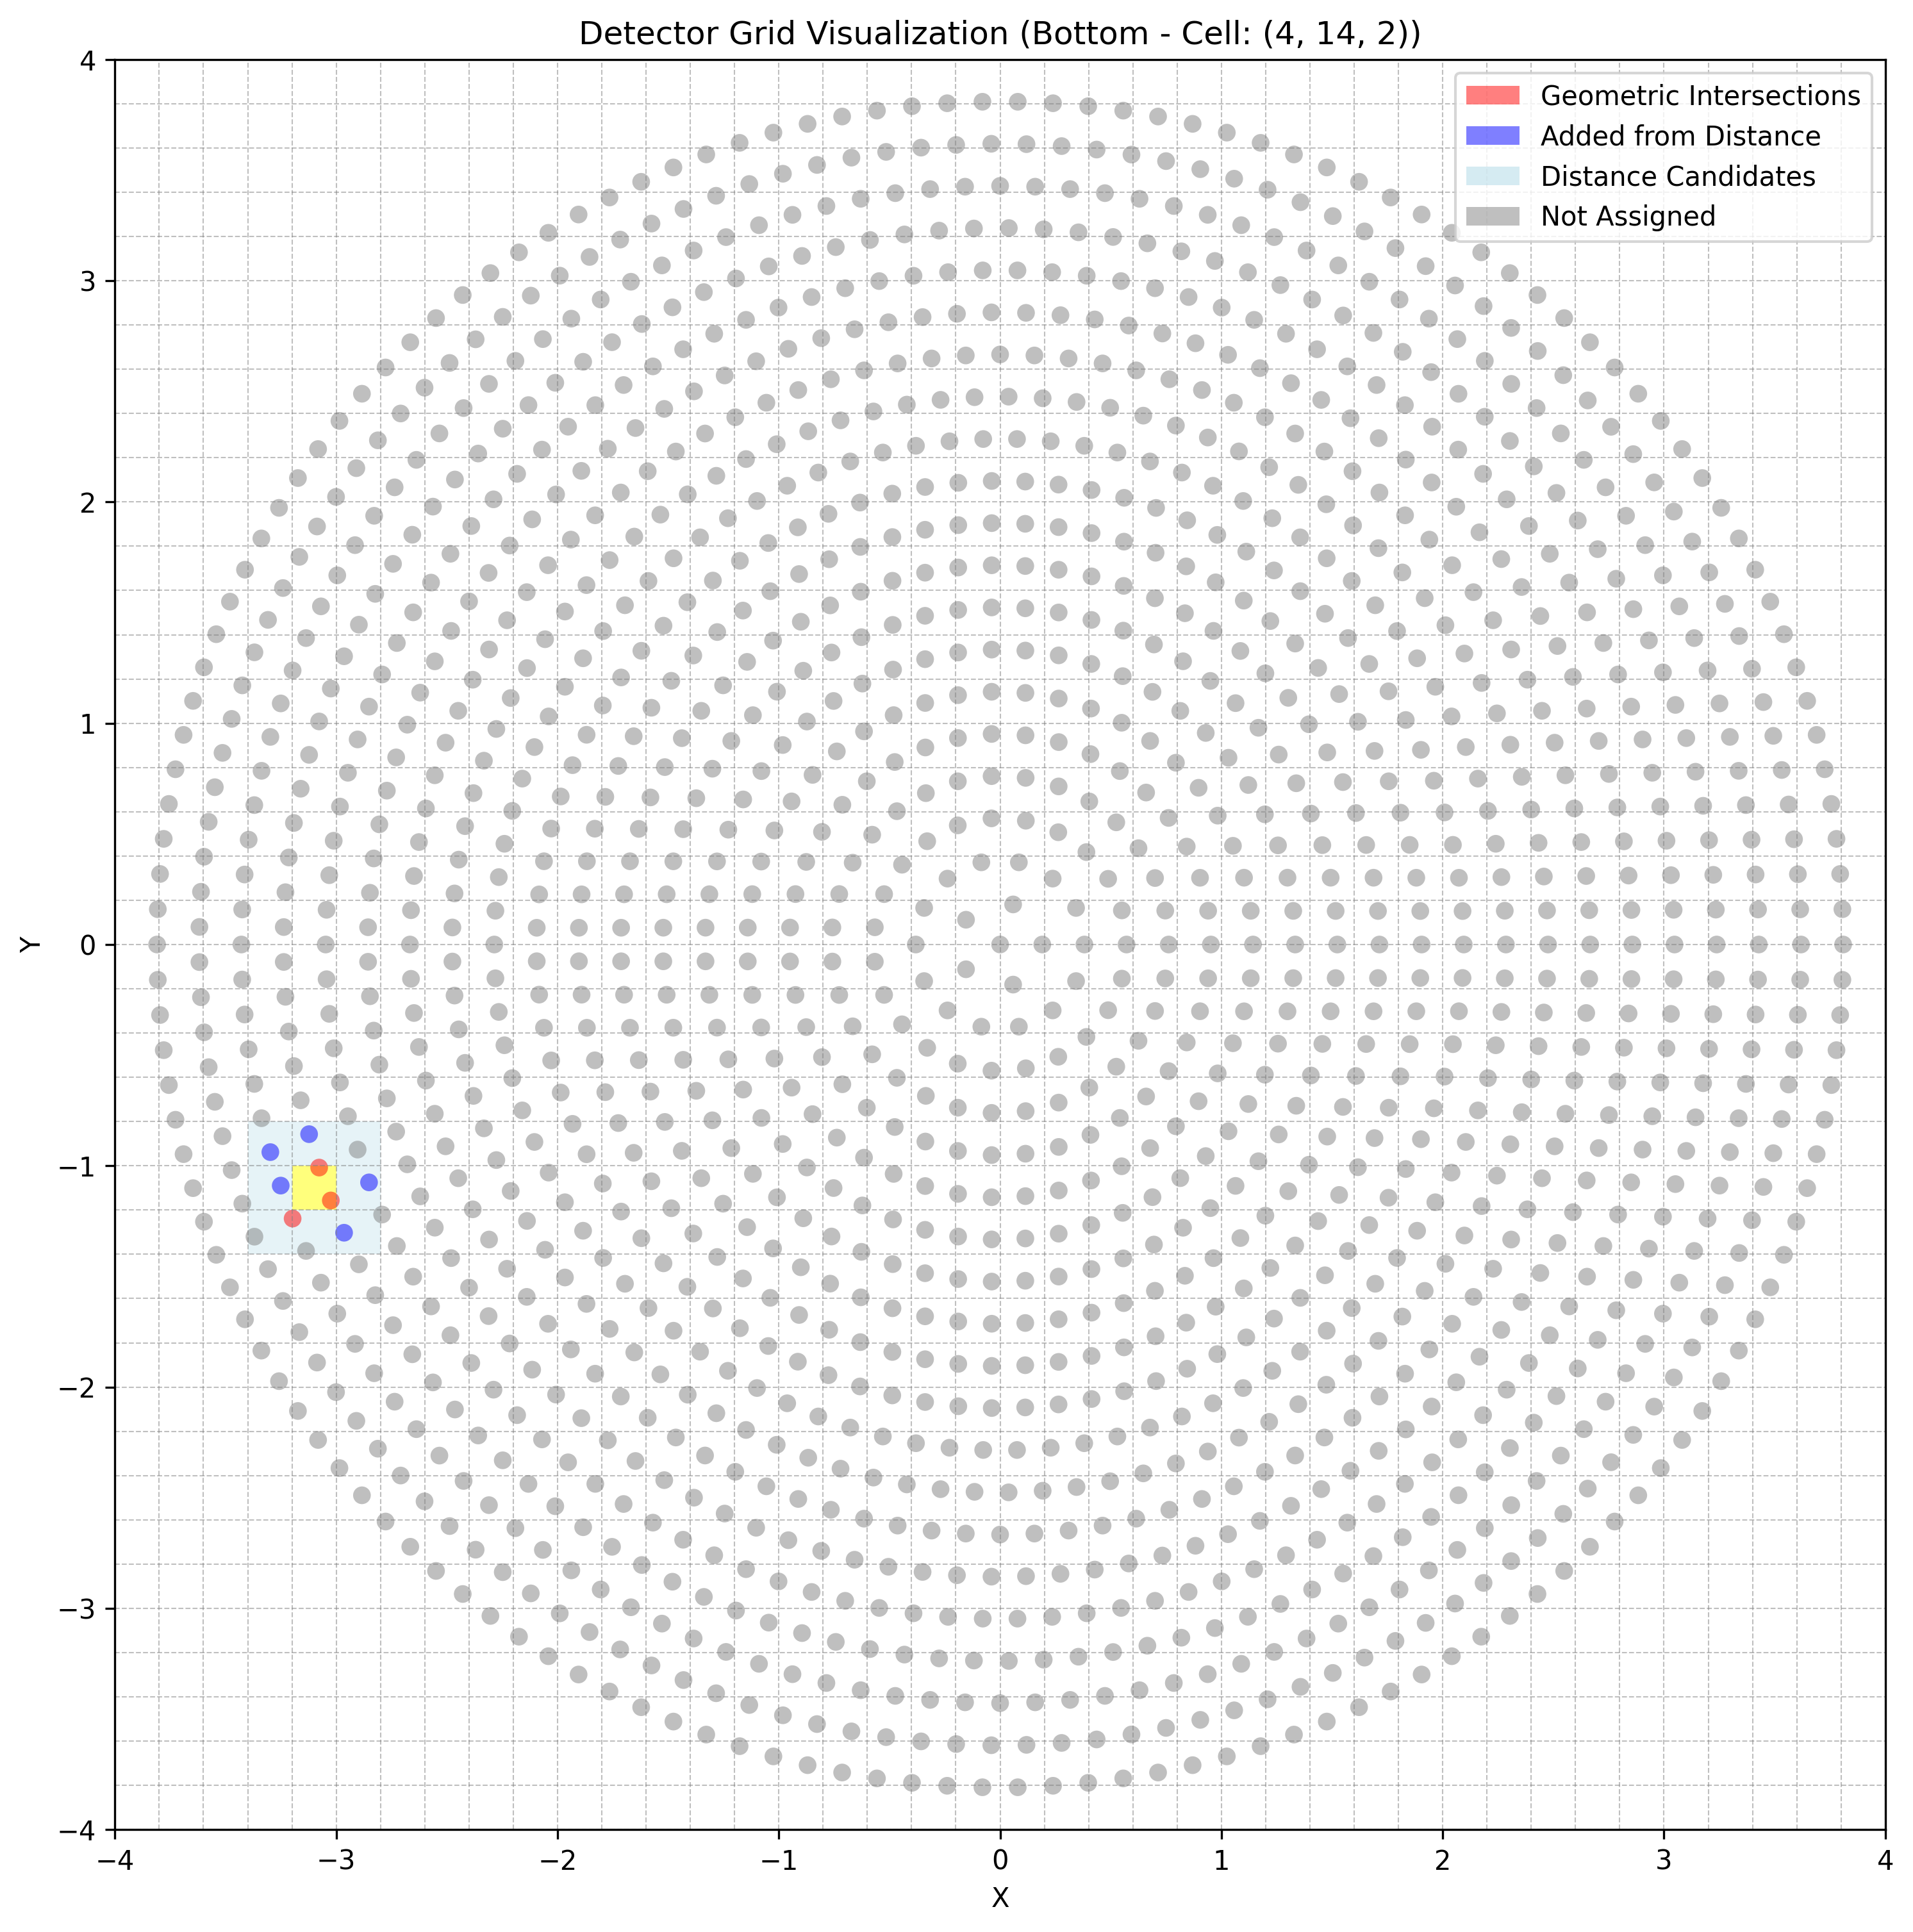

In [9]:
def visualize_detector_grid_new(assignments_geometric, assignments_distance, inverted_detector_map,
                              detector_points, detector_radius, r, h, n_cap, n_angular, n_height, dpi=300):
    """
    Visualize detector grid with both geometric and distance-based assignments
    """
    # Convert JAX arrays to NumPy
    assignments_geometric = np.array(assignments_geometric)
    assignments_distance = np.array(assignments_distance)
    inverted_detector_map = np.array(inverted_detector_map)
    detector_points = np.array(detector_points)

    def get_adjacent_cells(cell):
        i, j, k = cell
        if k == 0:  # Wall
            return [((i + di) % n_angular, (j + dj) % n_height, 0)
                   for di in [-1, 0, 1] for dj in [-1, 0, 1]]
        else:  # Cap
            return [((i + di) % n_cap, (j + dj) % n_cap, k)
                   for di in [-1, 0, 1] for dj in [-1, 0, 1]]

    # Choose a random cell
    k = np.random.choice([0, 1, 2])
    i, j = np.random.randint(0, n_angular if k == 0 else n_cap), np.random.randint(0, n_height if k == 0 else n_cap)
    center_cell = (i, j, k)

    # Get adjacent cells
    cells_to_plot = [center_cell] + get_adjacent_cells(center_cell)

    # Calculate cell index for inverted map
    def get_cell_index(cell):
        i, j, k = cell
        if k == 0:
            return i * n_height + j
        else:
            return (n_angular * n_height +
                   (k - 1) * n_cap * n_cap +
                   i * n_cap + j)

    # Get center cell index
    center_idx = get_cell_index(center_cell)

    # Get geometric intersections
    geometric_detectors = set()
    for det_idx, det_assignments in enumerate(assignments_geometric):
        # Unpack center cell
        ci, cj, ck = center_cell
        # Check if any assignment matches our cell coordinates
        if np.any((det_assignments[:, 0] == ci) &
                  (det_assignments[:, 1] == cj) &
                  (det_assignments[:, 2] == ck)):
            geometric_detectors.add(det_idx)

    # Get distance-based assignments for this cell
    distance_detectors = set(int(idx) for idx in assignments_distance[center_idx])

    # Get actual assigned detectors from inverted map
    final_detectors = set(int(idx) for idx in inverted_detector_map[center_idx][inverted_detector_map[center_idx] != -1])

    # Calculate distance-only detectors (those that weren't geometric)
    distance_only_detectors = distance_detectors - geometric_detectors

    # Set up the plot
    if k == 0:  # Wall
        circumference = 2 * np.pi * r
        aspect_ratio = circumference / h
        fig_width = min(20, max(10, 8 * aspect_ratio))
        fig_height = fig_width / aspect_ratio
        fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)
        ax.set_xlim(0, circumference)
        ax.set_ylim(-h/2, h/2)

        # Draw grid
        ax.vlines(np.linspace(0, circumference, n_angular+1), -h/2, h/2,
                 colors='gray', linestyles='--', alpha=0.5, linewidth=0.5)
        ax.hlines(np.linspace(-h/2, h/2, n_height+1), 0, circumference,
                 colors='gray', linestyles='--', alpha=0.5, linewidth=0.5)

        # Shade cells
        cell_width, cell_height = circumference / n_angular, h / n_height
        rects = [Rectangle((cell[0] * cell_width, -h/2 + cell[1] * cell_height),
                          cell_width, cell_height) for cell in cells_to_plot]

        # Transform detector coordinates
        on_surface = np.abs(np.sqrt(detector_points[:, 0]**2 + detector_points[:, 1]**2) - r) <= detector_radius
        x = np.arctan2(detector_points[on_surface, 1], detector_points[on_surface, 0]) % (2 * np.pi) * r
        y = detector_points[on_surface, 2]

    else:  # Cap
        fig, ax = plt.subplots(figsize=(10, 10), dpi=dpi)
        ax.set_xlim(-r, r)
        ax.set_ylim(-r, r)

        # Draw grid
        grid_lines = np.linspace(-r, r, n_cap + 1)
        ax.vlines(grid_lines, -r, r, colors='gray', linestyles='--', alpha=0.5, linewidth=0.5)
        ax.hlines(grid_lines, -r, r, colors='gray', linestyles='--', alpha=0.5, linewidth=0.5)

        # Shade cells
        cell_size = 2 * r / n_cap
        rects = [Rectangle((-r + cell[0] * cell_size, -r + cell[1] * cell_size),
                          cell_size, cell_size) for cell in cells_to_plot]

        # Transform detector coordinates
        on_surface = ((k == 1) & (detector_points[:, 2] > h/2 - detector_radius) |
                     (k == 2) & (detector_points[:, 2] < -h/2 + detector_radius))
        x, y = detector_points[on_surface, 0], detector_points[on_surface, 1]

    # Add shaded cells
    pc = PatchCollection(rects,
                        facecolors=['yellow' if cell == center_cell else 'lightblue'
                                  for cell in cells_to_plot],
                        edgecolors='none', alpha=0.3)
    ax.add_collection(pc)

    # Create circles for detectors
    circles = []
    colors = []

    for idx, (xi, yi) in enumerate(zip(x, y)):
        circle = Circle((xi, yi), detector_radius)
        circles.append(circle)

        det_idx = np.where(on_surface)[0][idx]
        if det_idx in geometric_detectors:
            colors.append('red')  # All geometric intersections (even if also in distance)
        elif det_idx in distance_only_detectors and det_idx in final_detectors:
            colors.append('blue')  # Distance-based assignments that made it (and weren't geometric)
        elif det_idx in distance_only_detectors:
            colors.append('lightblue')  # Distance-based candidates not used (and weren't geometric)
        else:
            colors.append('gray')  # Not assigned to this cell

    pc = PatchCollection(circles, facecolors=colors, alpha=0.5, edgecolors='none')
    ax.add_collection(pc)

    # Print statistics
    print(f"Geometric intersections: {len(geometric_detectors)}")
    print(f"Additional distance-based candidates: {len(distance_only_detectors)}")
    print(f"Final assigned detectors: {len(final_detectors)}")
    print(f"  - From geometric: {len(geometric_detectors)}")
    print(f"  - Added from distance: {len(final_detectors - geometric_detectors)}")

    # Set labels and title
    ax.set_xlabel("Distance along wall" if k == 0 else "X")
    ax.set_ylabel("Height" if k == 0 else "Y")
    if k != 0:
        ax.set_aspect("equal")
    else:
        ax.set_aspect("auto")

    plt.tight_layout()

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', alpha=0.5, label='Geometric Intersections'),
        Patch(facecolor='blue', alpha=0.5, label='Added from Distance'),
        Patch(facecolor='lightblue', alpha=0.5, label='Distance Candidates'),
        Patch(facecolor='gray', alpha=0.5, label='Not Assigned')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    cap_type = "Top" if k == 1 else "Bottom" if k == 2 else "Wall"
    ax.set_title(f"Detector Grid Visualization ({cap_type} - Cell: {center_cell})")
    plt.show()

# Example usage
r, h = 4.0, 6.0
n_cap, n_angular, n_height = 40, 168, 82

max_detectors_per_cell = 8

assignments_geometric = assign_detectors_to_grid(
    detector_points, detector_radius, r, h, n_cap, n_angular, n_height)

# Precompute distance-based assignments
grid_centers = calculate_grid_centers(r, h, n_cap, n_angular, n_height)
assignments_distance = find_closest_detectors(grid_centers, detector_points, max_detectors_per_cell)

inverted_detector_map = create_inverted_detector_map(
        assignments_geometric, assignments_distance,
        n_cap, n_angular, n_height,
        max_detectors_per_cell, detector_points.shape[0])

# Example usage:
visualize_detector_grid_new(
    assignments_geometric, assignments_distance, inverted_detector_map,
    detector_points, detector_radius, r, h, n_cap, n_angular, n_height
)

In [18]:
from tools.propagate import create_photon_propagator

In [10]:
propagate_photons = create_photon_propagator(detector_positions=detector_points, detector_radius=detector_radius, r=r, h=h, n_cap=n_cap, n_angular=n_angular, n_height=n_height)

Benchmarking with 100 photons...
  Average run time: 0.0001 seconds
Benchmarking with 1000 photons...
  Average run time: 0.0002 seconds
Benchmarking with 10000 photons...
  Average run time: 0.0009 seconds
Benchmarking with 100000 photons...
  Average run time: 0.0074 seconds
Benchmarking with 1000000 photons...
  Average run time: 0.0718 seconds
Benchmarking with 5000000 photons...
  Average run time: 4.3201 seconds


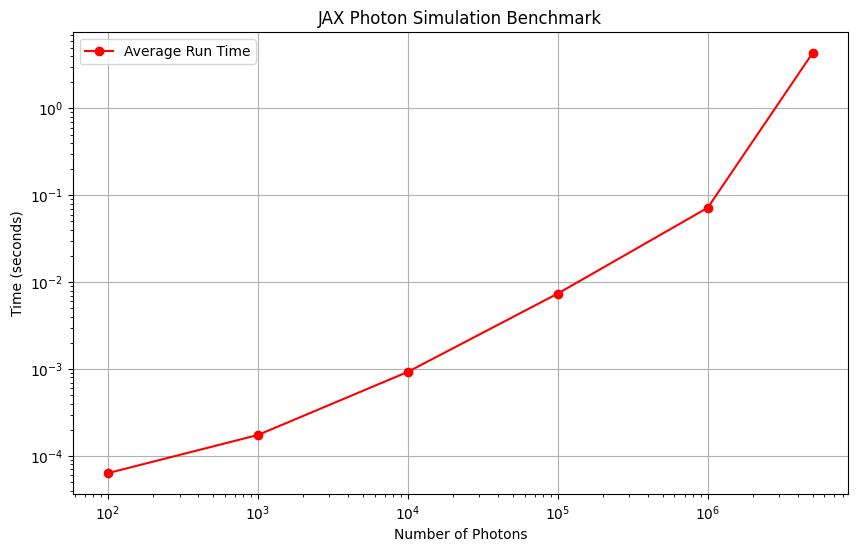

In [12]:
import time
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial

# Assume these functions are available from the previous code
# from tools.geometry import generate_detector
# propagate_photons function is also assumed to be available

def generate_random_photons(n_photons, cylinder_radius, cylinder_height):
    """Generate random photon origins and directions inside the cylinder."""
    key = jax.random.PRNGKey(0)
    key, subkey1, subkey2 = jax.random.split(key, 3)
    
    r = jax.random.uniform(subkey1, (n_photons,)) * cylinder_radius
    theta = jax.random.uniform(subkey1, (n_photons,)) * 2 * jnp.pi
    z = jax.random.uniform(subkey1, (n_photons,)) * cylinder_height - cylinder_height/2
    
    origins = jnp.column_stack((r * jnp.cos(theta), r * jnp.sin(theta), z))
    
    directions = jax.random.normal(subkey2, (n_photons, 3))
    directions = directions / jnp.linalg.norm(directions, axis=1, keepdims=True)
    
    return origins, directions


def benchmark_simulation(photon_counts, n_runs=10):
    run_times = []
    
    # Generate detector positions (this is done once outside the loop)
    detector = generate_detector('config/cyl_geom_config.json')
    detector_points = jnp.array(detector.all_points)
    detector_radius = detector.S_radius
    
    cylinder_radius = 4.0
    cylinder_height = 6.0
    
    for n_photons in photon_counts:
        print(f"Benchmarking with {n_photons} photons...")
        
        # Run the simulation multiple times
        run_times_for_this_n = []
        for _ in range(n_runs):
            photon_origins, photon_directions = generate_random_photons(n_photons, cylinder_radius, cylinder_height)
            start_run = time.time()
            _ = propagate_photons(photon_origins, photon_directions)
            jax.block_until_ready(_)
            end_run = time.time()
            run_time = end_run - start_run
            run_times_for_this_n.append(run_time)
        
        # Store the average run time
        run_times.append(sum(run_times_for_this_n) / n_runs)
        
        print(f"  Average run time: {run_times[-1]:.4f} seconds")
    
    return run_times

def plot_benchmark_results(photon_counts, run_times):
    plt.figure(figsize=(10, 6))
    plt.loglog(photon_counts, run_times, 'ro-', label='Average Run Time')
    plt.xlabel('Number of Photons')
    plt.ylabel('Time (seconds)')
    plt.title('JAX Photon Simulation Benchmark')
    plt.legend()
    plt.grid(True)
    plt.savefig("time.png")
    plt.show()

# Run the benchmark
photon_counts = [100, 1000, 10000, 100000, 1000000, 5000000]
run_times = benchmark_simulation(photon_counts)

# Plot the results
plot_benchmark_results(photon_counts, run_times)

  0%|          | 0/200 [00:00<?, ?it/s]

ar=132, n_height=64...Benchmarking with n_cap=32, n_angular=58, n_height=47...Benchmarking with n_cap=80, n_angular=127, n_height=23...Benchmarking with n_cap=84, n_angular=79, n_height=88...Benchmarking with n_cap=27, n_angular=129, n_height=62...Benchmarking with n_cap=84, n_angular=107, n_height=63...Benchmarking with n_cap=60, n_angular=102, n_height=12...Benchmarking with n_cap=63, n_angular=171, n_height=53...Benchmarking with n_cap=42, n_angular=196, n_height=67...Benchmarking with n_cap=86, n_angular=183, n_height=35...Benchmarking with n_cap=69, n_angular=157, n_height=95...Benchmarking with n_cap=22, n_angular=63, n_height=58...Benchmarking with n_cap=24, n_angular=20, n_height=49...Benchmarking with n_cap=33, n_angular=174, n_height=26...Benchmarking with n_cap=19, n_angular=192, n_height=33...Benchmarking with n_cap=34, n_angular=193, n_height=86...Benchmarking with n_cap=86, n_angular=56, n_height=99...Benchmarking with n_cap=96, n_angular=99, n_height=95...Benchmarking wi

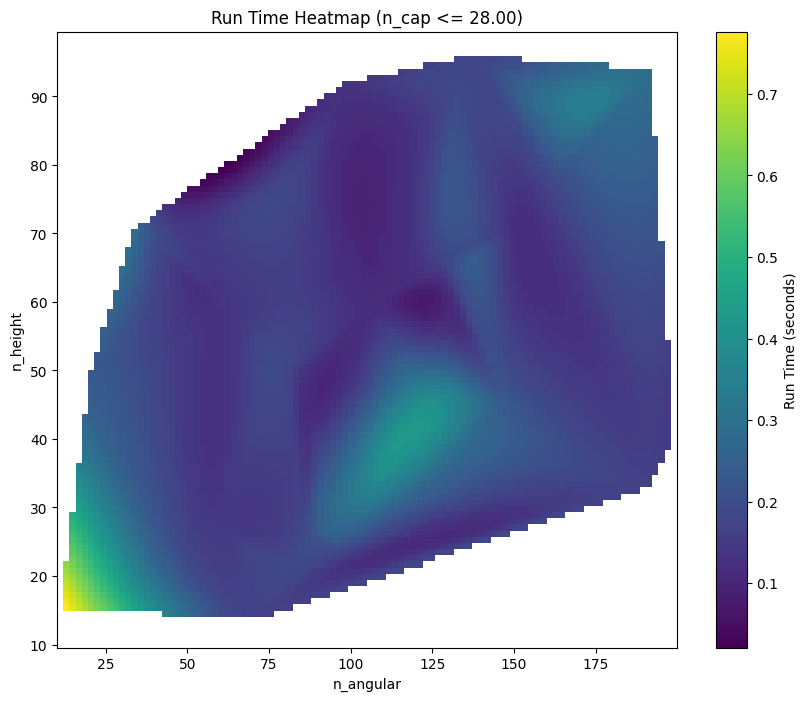

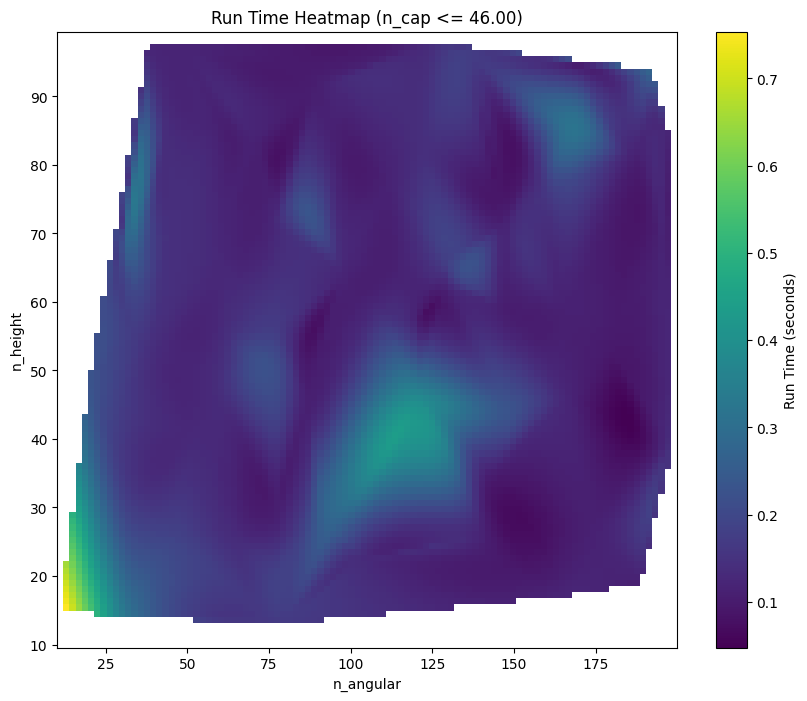

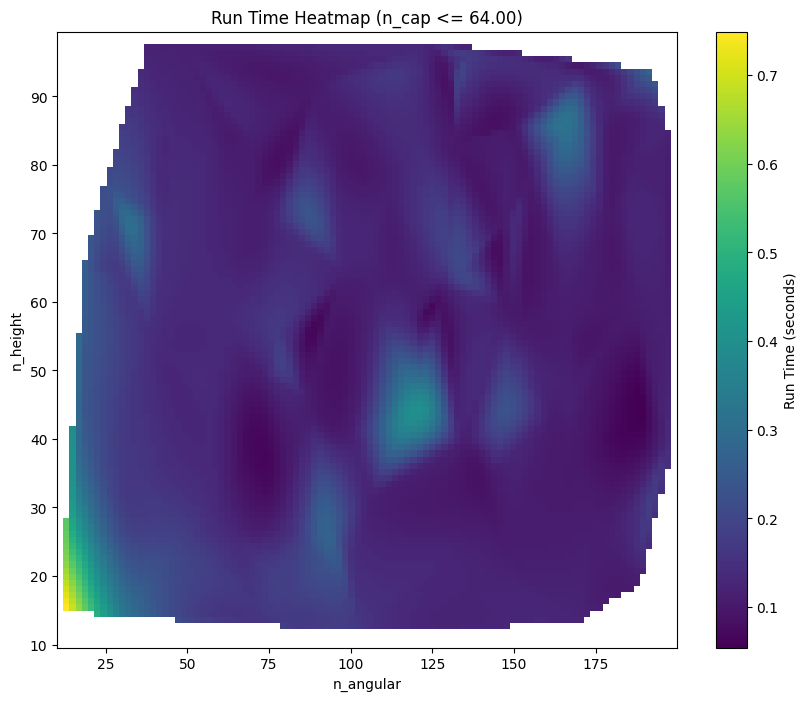

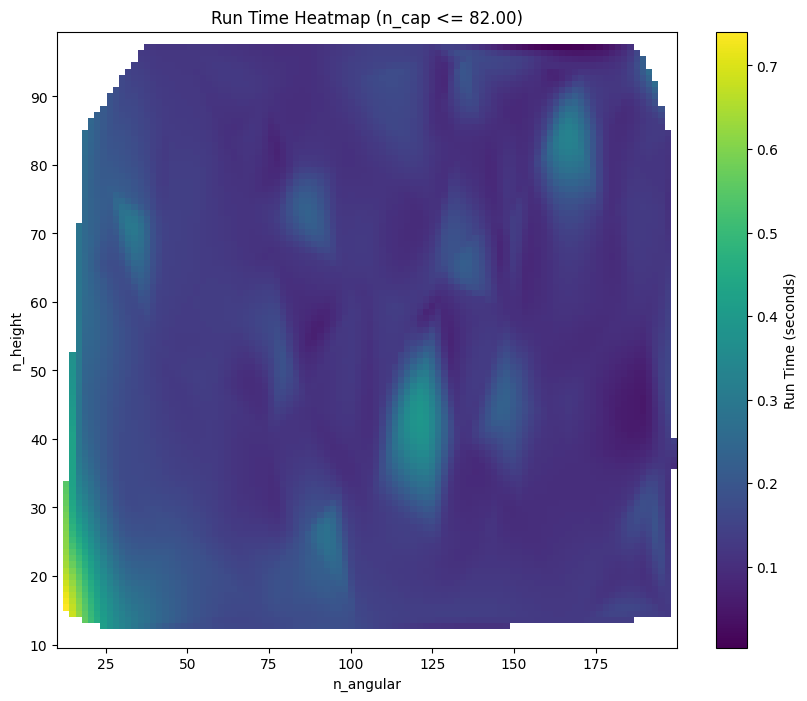

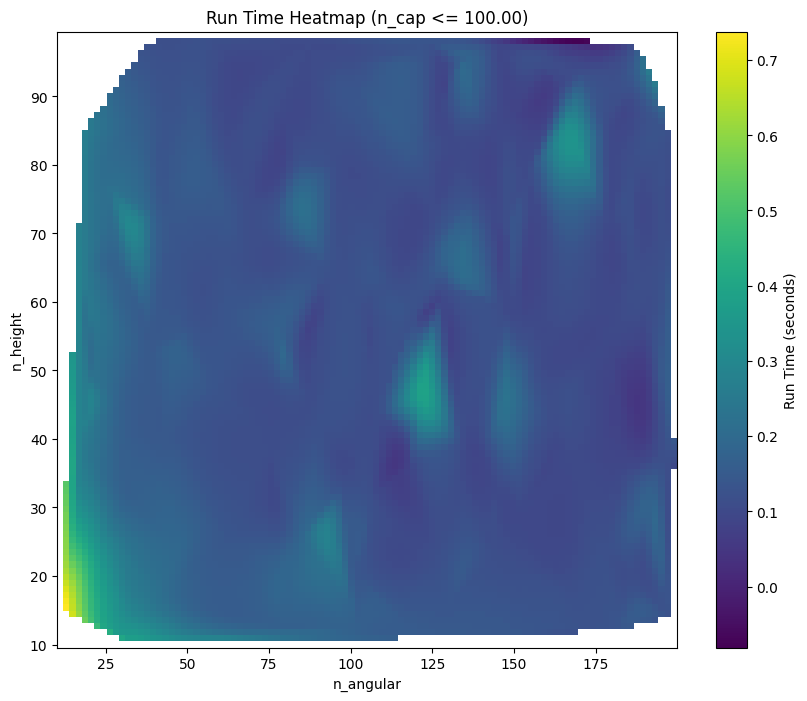

In [22]:
import time
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy.interpolate import griddata
from tqdm.notebook import tqdm

# Assume these functions are available from the previous code
# from tools.geometry import generate_detector
# create_photon_propagator function is also assumed to be available

def generate_random_photons(n_photons, cylinder_radius, cylinder_height):
    """Generate random photon origins and directions inside the cylinder."""
    key = jax.random.PRNGKey(0)
    key, subkey1, subkey2 = jax.random.split(key, 3)
    
    r = jax.random.uniform(subkey1, (n_photons,)) * cylinder_radius
    theta = jax.random.uniform(subkey1, (n_photons,)) * 2 * jnp.pi
    z = jax.random.uniform(subkey1, (n_photons,)) * cylinder_height - cylinder_height/2
    
    origins = jnp.column_stack((r * jnp.cos(theta), r * jnp.sin(theta), z))
    
    directions = jax.random.normal(subkey2, (n_photons, 3))
    directions = directions / jnp.linalg.norm(directions, axis=1, keepdims=True)
    
    return origins, directions

def benchmark_simulation(n_total, n_runs=10):
    run_times = []
    params = []
    
    # Generate detector positions (this is done once outside the loop)
    detector = generate_detector('config/cyl_geom_config.json')
    detector_points = jnp.array(detector.all_points)
    detector_radius = detector.S_radius
    
    cylinder_radius = 4.0
    cylinder_height = 6.0
    n_photons = 1000000  # 10^6 photons

    for _ in tqdm(range(n_total)):
        # Randomly choose parameters
        n_cap = np.random.randint(10, 101)
        n_angular = np.random.randint(10, 201)
        n_height = np.random.randint(10, 101)
        
        photon_origins, photon_directions = generate_random_photons(n_photons, cylinder_radius, cylinder_height)
    
        propagate_photons = create_photon_propagator(detector_positions=detector_points, detector_radius=detector_radius, r=cylinder_radius, h=cylinder_height, n_cap=n_cap, n_angular=n_angular, n_height=n_height)
        
        params.append((n_cap, n_angular, n_height))
        
        print(f"Benchmarking with n_cap={n_cap}, n_angular={n_angular}, n_height={n_height}...", end="\r")
        
        # Run the simulation multiple times
        run_times_for_this_n = []
        for _ in range(n_runs):
            start_run = time.time()
            
            results = propagate_photons(photon_origins, photon_directions)
            
            jax.block_until_ready(_)
            end_run = time.time()
            run_time = end_run - start_run
            run_times_for_this_n.append(run_time)
        
        # Store the average run time
        run_times.append(sum(run_times_for_this_n) / n_runs)
        
        print(f"  Average run time: {run_times[-1]:.4f} seconds", end="\r")
    
    return params, run_times

def plot_2d_heatmaps(params, run_times):
    n_caps, n_angulars, n_heights = zip(*params)
    n_caps, n_angulars, n_heights = np.array(n_caps), np.array(n_angulars), np.array(n_heights)
    run_times = np.array(run_times)
    
    # Create a grid for interpolation
    xi = np.linspace(min(n_angulars), max(n_angulars), 100)
    yi = np.linspace(min(n_heights), max(n_heights), 100)
    Xi, Yi = np.meshgrid(xi, yi)
    
    # Calculate the range of n_cap values and split into 5 steps
    num_steps = 5
    n_cap_min, n_cap_max = min(n_caps), max(n_caps)
    n_cap_step = (n_cap_max - n_cap_min) / num_steps
    n_cap_thresholds = [n_cap_min + i*n_cap_step for i in range(1, num_steps+1)]
    
    # Plot heatmaps for different n_cap ranges
    for i, n_cap_threshold in enumerate(n_cap_thresholds):
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Filter data for current n_cap range (including all lower values)
        mask = n_caps <= n_cap_threshold
        x = n_angulars[mask]
        y = n_heights[mask]
        z = run_times[mask]
        
        if len(x) < 4:  # Minimum number of points required for cubic interpolation
            print(f"Not enough data points for n_cap <= {n_cap_threshold:.2f}")
            plt.close(fig)
            continue
        
        # Interpolate
        Zi = griddata((x, y), z, (Xi, Yi), method='cubic')
        
        # Plot heatmap
        im = ax.pcolormesh(Xi, Yi, Zi, shading='auto', cmap='viridis')
        plt.colorbar(im, ax=ax, label='Run Time (seconds)')
        
        ax.set_xlabel('n_angular')
        ax.set_ylabel('n_height')
        ax.set_title(f'Run Time Heatmap (n_cap <= {n_cap_threshold:.2f})')
        plt.show()
        
        plt.savefig(f"heatmap_ncap_threshold_{i+1}.png")
        plt.close()

# The rest of your code remains the same
# ...

# Run the benchmark
n_total = 200  # Total number of parameter combinations to test
params, run_times = benchmark_simulation(n_total)

# Plot the heatmaps
plot_2d_heatmaps(params, run_times)

In [23]:
?np.min

In [32]:
sorted_times = np.argsort(run_times)
for i in range(len(params)):
    print(params[sorted_times[i]], run_times[sorted_times[i]])

(56, 149, 86) 0.09192190170288086
(79, 186, 98) 0.09234509468078614
(94, 145, 98) 0.09319188594818115
(84, 164, 91) 0.09418144226074218
(63, 171, 53) 0.09501490592956544
(59, 147, 70) 0.09528601169586182
(68, 127, 87) 0.09534299373626709
(86, 69, 92) 0.09550061225891113
(73, 164, 92) 0.09583868980407714
(65, 147, 30) 0.09672949314117432
(87, 119, 36) 0.09695124626159668
(47, 156, 74) 0.09707214832305908
(42, 143, 34) 0.09724066257476807
(61, 149, 85) 0.09736194610595703
(95, 163, 39) 0.09752533435821534
(70, 199, 36) 0.09798510074615478
(73, 153, 29) 0.09817736148834229
(98, 118, 39) 0.09824061393737793
(86, 183, 35) 0.09853670597076417
(41, 191, 37) 0.09862692356109619
(44, 179, 54) 0.09864993095397949
(63, 180, 75) 0.09884929656982422
(90, 140, 39) 0.09933211803436279
(62, 132, 83) 0.10082378387451171
(70, 142, 85) 0.10092840194702149
(80, 171, 51) 0.10124375820159912
(84, 79, 88) 0.10170495510101318
(62, 182, 59) 0.10242643356323242
(64, 130, 94) 0.10294930934906006
(48, 178, 71) 0.

In [55]:
params_np = np.array(params)
run_times_np = np.array(run_times)
print(params_np)
print(run_times_np.shape)

[[ 16 132  64]
 [ 32  58  47]
 [ 80 127  23]
 [ 84  79  88]
 [ 27 129  62]
 [ 84 107  63]
 [ 60 102  12]
 [ 63 171  53]
 [ 42 196  67]
 [ 86 183  35]
 [ 69 157  95]
 [ 22  63  58]
 [ 24  20  49]
 [ 33 174  26]
 [ 19 192  33]
 [ 34 193  86]
 [ 86  56  99]
 [ 96  99  95]
 [ 43 171  94]
 [ 92  54  81]
 [ 42  28  45]
 [ 20 199  40]
 [100 102  23]
 [ 36 154  79]
 [ 24 149  71]
 [ 73 142  72]
 [ 87  44  17]
 [ 70 198  14]
 [ 31 124  98]
 [ 30 113  64]
 [ 43  59  68]
 [ 18  73  14]
 [ 39 166  17]
 [ 55 184  21]
 [ 56 149  86]
 [ 51 185  75]
 [ 58 179  85]
 [ 13 192  94]
 [ 36 112  78]
 [ 57 161  43]
 [ 59  25  78]
 [ 90  63  73]
 [ 14 148  45]
 [ 29 193  85]
 [ 29 119  58]
 [ 82 190  59]
 [ 66  27  12]
 [ 58 196  74]
 [ 37  46  73]
 [ 98  29  24]
 [ 28  96  80]
 [ 36  60  84]
 [ 88 103  37]
 [ 77 100  81]
 [ 38 147  59]
 [ 12  33  70]
 [ 17 161  76]
 [ 20  58  28]
 [ 65 171  48]
 [ 44  32  32]
 [ 73  73  29]
 [ 35  33  14]
 [ 93  78  49]
 [ 91 123  11]
 [ 79 186  98]
 [ 27  87  45]
 [ 30 120 

In [42]:
print(run_times)

[0.19251551628112792, 0.1329977035522461, 0.11685991287231445, 0.10170495510101318, 0.11554927825927734, 0.13432414531707765, 0.16736390590667724, 0.09501490592956544, 0.11929731369018555, 0.09853670597076417, 0.11714057922363282, 0.13718290328979493, 0.23200557231903077, 0.11244966983795165, 0.16443803310394287, 0.12755084037780762, 0.12183153629302979, 0.11192374229431153, 0.10690517425537109, 0.15390677452087403, 0.18270907402038575, 0.1454467535018921, 0.14622983932495118, 0.10383400917053223, 0.1301190137863159, 0.10991799831390381, 0.20416831970214844, 0.1249666690826416, 0.13161799907684327, 0.11110110282897949, 0.12671327590942383, 0.16218812465667726, 0.12157552242279053, 0.11119377613067627, 0.09192190170288086, 0.12169640064239502, 0.10550634860992432, 0.2842649221420288, 0.11615307331085205, 0.11202013492584229, 0.21011753082275392, 0.13692007064819336, 0.22737412452697753, 0.12909677028656005, 0.12076292037963868, 0.10801525115966797, 0.37092177867889403, 0.119707870483398

In [52]:

print(params_np[sorted_params][:,0])

[ 10  11  12  13  14  15  16  16  16  16  17  17  17  18  18  19  19  19
  19  19  19  20  20  22  24  24  24  24  25  26  27  27  28  29  29  29
  29  29  30  30  30  30  30  30  31  31  31  32  32  33  33  33  33  34
  35  36  36  36  36  36  36  37  37  38  38  38  39  39  40  40  41  41
  41  42  42  42  42  43  43  44  44  44  44  44  45  45  47  47  47  48
  48  49  50  51  52  53  54  54  55  55  55  56  56  56  56  57  57  58
  58  58  59  59  59  60  61  61  62  62  62  63  63  64  65  65  65  66
  67  67  67  67  68  69  69  70  70  70  70  70  71  72  73  73  73  73
  73  74  74  74  75  77  79  79  80  80  80  80  81  82  82  84  84  84
  84  85  85  85  86  86  86  86  86  86  87  87  87  88  88  89  89  89
  90  90  90  90  91  92  92  93  93  94  94  95  95  96  97  98  98  99
  99 100]


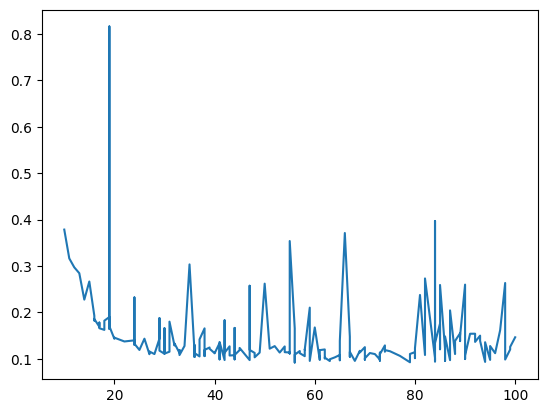

In [61]:
index = 0
sorted_params = np.argsort(params_np[:,index])
plt.plot(params_np[sorted_params][:,index], run_times_np[sorted_params])

In [ ]:
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_random_photons(key, N, r, h):
    """Generate N random photon origins and directions inside the cylinder."""
    key1, key2, key3, key4, key5 = random.split(key, 5)
    
    # Random origins inside the cylinder
    radius = r * jnp.sqrt(random.uniform(key1, (N,)))
    theta = random.uniform(key2, (N,), minval=0, maxval=2*jnp.pi)
    z = random.uniform(key3, (N,), minval=-h/2, maxval=h/2)
    
    origins = jnp.column_stack((radius * jnp.cos(theta), radius * jnp.sin(theta), z))
    
    # Random directions (uniformly distributed on a sphere)
    phi = random.uniform(key4, (N,), minval=0, maxval=2*jnp.pi)
    cos_theta = random.uniform(key5, (N,), minval=-1, maxval=1)
    sin_theta = jnp.sqrt(1 - cos_theta**2)
    
    directions = jnp.column_stack((sin_theta * jnp.cos(phi),
                                   sin_theta * jnp.sin(phi),
                                   cos_theta))
    
    return origins, directions

def plot_multiple_photons(origins, directions, results, detector_points, detector_radius, r, h, N):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot cylinder
    theta = jnp.linspace(0, 2*jnp.pi, 100)
    z = jnp.linspace(-h/2, h/2, 100)
    theta, z = jnp.meshgrid(theta, z)
    x = r * jnp.cos(theta)
    y = r * jnp.sin(theta)
    ax.plot_surface(x, y, z, alpha=0.1, color='gray')

    # Plot photon paths and hit detectors
    for i in range(N):
        origin = origins[i]
        direction = directions[i]
        result = results[i]
        end_point = origin + result[1] * direction
        ax.plot([origin[0], end_point[0]], 
                [origin[1], end_point[1]], 
                [origin[2], end_point[2]], 
                '-', linewidth=1, alpha=0.6, label='Photon' if i == 0 else "")
        ax.scatter(*origin, color='g', s=20, alpha=0.6)

        detector_index = int(result[0])
        if detector_index >= 0:
            hit_detector = detector_points[detector_index]
            ax.scatter(*hit_detector, color='r', s=50, alpha=0.6)

            # Plot detector sphere with exact radius
            u, v = jnp.mgrid[0:2*jnp.pi:10j, 0:jnp.pi:5j]
            x = hit_detector[0] + detector_radius * jnp.cos(u) * jnp.sin(v)
            y = hit_detector[1] + detector_radius * jnp.sin(u) * jnp.sin(v)
            z = hit_detector[2] + detector_radius * jnp.cos(v)
            ax.plot_surface(x, y, z, color="b", alpha=0.1)

    # Set axis limits and labels
    ax.set_xlim(-r, r)
    ax.set_ylim(-r, r)
    ax.set_zlim(-h/2, h/2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Propagation of {N} Photons in Cylindrical Detector')
    ax.legend()

    plt.show()

# Assuming you have these values defined
r, h = 4.0, 6.0
detector_radius = 0.04  # You may need to adjust this value
N = 100  # Number of photons to simulate

# Generate all photons at once
key = random.PRNGKey(0)  # Use a seed for reproducibility
origins, directions = generate_random_photons(key, N, r/2, h/2)
directions = directions.at[:, 0].set(0)
directions = directions.at[:, 1].set(-1)
directions = directions.at[:, 2].set(0)

# Propagate all photons at once
results = propagate_photons(origins, directions)

# Plot the results
plot_multiple_photons(origins, directions, results, detector_points, detector_radius, r, h, N)

# Print summary statistics
hit_count = jnp.sum(results[:, 0] >= 0)
print(f"Total photons: {N}")
print(f"Photons that hit a detector: {hit_count}")
print(f"Hit rate: {hit_count/N:.2%}")

In [13]:
import jax.numpy as jnp
from tools.propagate import assign_detectors_to_grid

# Test parameters
r = 5.0  # radius of the cylinder
h = 10.0  # height of the cylinder
n_radial = 5  # number of radial divisions
n_angular = 8  # number of angular divisions
n_height = 10  # number of height divisions
detector_radius = 0.5  # radius of each detector

def run_test(detector_position, expected_output, description):
    result = assign_detectors_to_grid(jnp.array([detector_position]), detector_radius, r, h, n_radial, n_angular, n_height)[0]
    print(f"Test: {description}")
    print(f"Detector position: {detector_position}")
    print(f"Expected output:\n{jnp.array(expected_output)}")
    print(f"Actual output:\n{result}")
    print("Test passed:", jnp.array_equal(result, jnp.array(expected_output)))
    assert(jnp.array_equal(result, jnp.array(expected_output)))
    print()

# Test cases
tests = [
    # Test 1: Detector exactly on the wall, middle height
    ((5.0, 0.0, 0.0), [[0, 5, 0], [1, 5, 0], [-1, -1, -1], [-1, -1, -1]], 
     "Detector exactly on the wall, middle height"),

    # Test 2: Detector on the top cap, away from wall
    ((2.5, 0.0, 5.0), [[2, 0, 1], [2, 1, 1], [-1, -1, -1], [-1, -1, -1]], 
     "Detector on the top cap, away from wall"),

    # Test 3: Detector on the wall, close to top cap
    ((5.0, 0.0, 4.6), [[0, 9, 0], [1, 9, 0], [4, 0, 1], [4, 1, 1]], 
     "Detector on the wall, close to top cap"),

    # Test 4: Detector near the wall and top cap intersection
    ((4.9, 0.0, 5.0), [[0, 9, 0], [1, 9, 0], [4, 0, 1], [4, 1, 1]], 
     "Detector near the wall and top cap intersection"),

    # Test 5: Detector at a corner (wall, top cap, and angular division)
    ((4.9, 0.1, 5.0), [[0, 9, 0], [1, 9, 0], [4, 0, 1], [4, 1, 1]], 
     "Detector at a corner (wall, top cap, and angular division)"),

    # Test 6: Detector on the bottom cap, away from wall
    ((2.5, 0.0, -5.0), [[2, 0, 2], [2, 1, 2], [-1, -1, -1], [-1, -1, -1]], 
     "Detector on the bottom cap, away from wall"),

    # Test 7: Detector near the wall and bottom cap intersection
    ((4.9, 0.0, -5.0), [[0, 0, 0], [1, 0, 0], [4, 0, 2], [4, 1, 2]], 
     "Detector near the wall and bottom cap intersection"),

    # Test 8: Detector inside the cylinder, not close to any surface
    ((2.5, 0.0, 0.0), [[-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1]], 
     "Detector inside the cylinder, not close to any surface"),

    # Test 9: Detector outside the cylinder
    ((6.0, 0.0, 0.0), [[-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1]], 
     "Detector outside the cylinder"),

    # Test 10: Detector on the wall, at an angle
    ((3.54, 3.54, 0.0), [[1, 5, 0], [2, 5, 0], [-1, -1, -1], [-1, -1, -1]], 
     "Detector on the wall, at a 45-degree angle"),
    
        # Test 11: Detector exactly on the wall, top edge
    ((5.0, 0.0, 5.0), [[0, 9, 0], [1, 9, 0], [4, 0, 1], [4, 1, 1]], 
     "Detector exactly on the wall, top edge"),

    # Test 12: Detector exactly on the wall, bottom edge
    ((5.0, 0.0, -5.0), [[0, 0, 0], [1, 0, 0], [4, 0, 2], [4, 1, 2]], 
     "Detector exactly on the wall, bottom edge"),

    # Test 13: Detector exactly on top cap edge
    ((5.0, 0.0, 5.0), [[0, 9, 0], [1, 9, 0], [4, 0, 1], [4, 1, 1]], 
     "Detector exactly on top cap edge"),

    # Test 14: Detector exactly on bottom cap edge
    ((5.0, 0.0, -5.0), [[0, 0, 0], [1, 0, 0], [4, 0, 2], [4, 1, 2]], 
     "Detector exactly on bottom cap edge"),

    # Test 15: Detector slightly inside the cylinder near wall
    ((4.9, 0.0, 0.0), [[0, 5, 0], [1, 5, 0], [-1, -1, -1], [-1, -1, -1]], 
     "Detector slightly inside the cylinder near wall"),

    # Test 17: Detector at exact angular boundary on wall
    ((0.0, 5.0, 0.0), [[2, 5, 0], [3, 5, 0], [-1, -1, -1], [-1, -1, -1]], 
     "Detector at exact angular boundary on wall"),

    # Test 18: Detector at exact height boundary on wall
    ((5.0, 0.0, 1.0), [[0, 6, 0], [1, 6, 0], [0, 7, 0], [1, 7, 0]], 
     "Detector at exact height boundary on wall"),

    # Test 19: Detector at exact radial boundary on cap
    ((3.0, 0.0, 5.0), [[2, 0, 1], [2, 1, 1], [3, 0, 1], [3, 1, 1]], 
     "Detector at exact radial boundary on cap"),

    # Test 20: Detector very close to cylinder axis on cap
    ((0.01, 0.0, 5.0), [[0, 0, 1], [0, 1, 1], [-1, -1, -1], [-1, -1, -1]], 
     "Detector very close to cylinder axis on cap"),

    # Test 21: Detector at maximum possible radius on cap
    ((5.0, 0.0, 5.0), [[0, 9, 0], [1, 9, 0], [4, 0, 1], [4, 1, 1]], 
     "Detector at maximum possible radius on cap"),

    # Test 22: Detector just below top cap
    ((0.0, 0.0, 4.99), [[0, 0, 1], [0, 1, 1], [-1, -1, -1], [-1, -1, -1]], 
     "Detector just below top cap"),

    # Test 23: Detector just above bottom cap
    ((0.0, 0.0, -4.99), [[0, 0, 2], [0, 1, 2], [-1, -1, -1], [-1, -1, -1]], 
     "Detector just above bottom cap"),

    # Test 24: Detector at extreme angle on wall
    ((0.01, 4.99, 0.0), [[1, 5, 0], [2, 5, 0], [-1, -1, -1], [-1, -1, -1]], 
     "Detector at extreme angle on wall"),

    # Test 25: Detector at cylinder corner (wall, cap, and angular division)
    ((4.99, 0.01, 5.0), [[0, 9, 0], [1, 9, 0], [4, 0, 1], [4, 1, 1]], 
     "Detector at cylinder corner (wall, cap, and angular division)"),
]

# Run all tests
for test in tests:
    run_test(*test)

Test: Detector exactly on the wall, middle height
Detector position: (5.0, 0.0, 0.0)
Expected output:
[[ 0  5  0]
 [ 1  5  0]
 [-1 -1 -1]
 [-1 -1 -1]]
Actual output:
[[0 5 0]
 [0 4 0]
 [7 5 0]
 [7 4 0]]
Test passed: False


AssertionError: 

In [ ]:
import jax.numpy as jnp
from jax import random
from tools.propagate import assign_detectors_to_grid, create_detector_grid_map

def test_create_detector_grid_map():
    # Test parameters
    r = 5.0  # radius of the cylinder
    h = 10.0  # height of the cylinder
    n_radial = 5  # number of radial divisions
    n_angular = 8  # number of angular divisions
    n_height = 10  # number of height divisions
    detector_radius = 0.5  # radius of each detector

    def run_test(detector_positions, description):
        assignments = assign_detectors_to_grid(jnp.array(detector_positions), detector_radius, r, h, n_radial, n_angular, n_height)
        result = create_detector_grid_map(assignments, n_radial, n_angular, n_height)
        print(f"Test: {description}")
        print(f"Detector positions:\n{detector_positions}")
        print(f"Assignments:\n{assignments}")
        print(f"Resulting grid map:\n{result}")
        print(f"Sum of grid map: {result.sum()} (should equal number of valid assignments)")
        print()

        return result

    # Test cases
    tests = [
        # Test 1: Single detector on the wall
        ([(5.0, 0.0, 0.0)], "Single detector on the wall"),

        # Test 2: Single detector on the top cap
        ([(2.5, 0.0, 5.0)], "Single detector on the top cap"),

        # Test 3: Single detector on the bottom cap
        ([(2.5, 0.0, -5.0)], "Single detector on the bottom cap"),

        # Test 4: Detector at wall-top cap intersection
        ([(4.9, 0.0, 5.0)], "Detector at wall-top cap intersection"),

        # Test 5: Detector at wall-bottom cap intersection
        ([(4.9, 0.0, -5.0)], "Detector at wall-bottom cap intersection"),

        # Test 6: Multiple detectors on different parts
        ([(5.0, 0.0, 0.0), (2.5, 0.0, 5.0), (2.5, 0.0, -5.0)], "Multiple detectors on different parts"),

        # Test 7: Detectors at all corners
        ([(4.9, 0.1, 5.0), (4.9, -0.1, 5.0), (4.9, 0.1, -5.0), (4.9, -0.1, -5.0)], "Detectors at all corners"),

        # Test 8: Detector inside the cylinder (should not be assigned)
        ([(2.5, 0.0, 0.0)], "Detector inside the cylinder"),

        # Test 9: Detector outside the cylinder (should not be assigned)
        ([(6.0, 0.0, 0.0)], "Detector outside the cylinder"),

        # Test 10: Many detectors randomly placed
        (random.uniform(random.PRNGKey(0), (100, 3), minval=-6, maxval=6).tolist(), "Many detectors randomly placed"),

        # Test 11: Edge case - detectors exactly on grid boundaries
        ([(5.0, 0.0, 0.0), (5.0, 0.0, 2.5), (5.0, 0.0, 5.0), (5.0, 0.0, -2.5), (5.0, 0.0, -5.0)], "Detectors on grid boundaries"),

        # Test 12: Edge case - detectors very close to each other
        ([(5.0, 0.0, 0.0), (5.0, 0.01, 0.0), (5.0, -0.01, 0.0)], "Detectors very close to each other"),
    ]

    # Run all tests
    for detector_positions, description in tests:
        run_test(detector_positions, description)

    # Additional verification
    # Test that the sum of the grid map equals the number of valid assignments
    def verify_sum(detector_positions):
        assignments = assign_detectors_to_grid(jnp.array(detector_positions), detector_radius, r, h, n_radial, n_angular, n_height)
        grid_map = create_detector_grid_map(assignments, n_radial, n_angular, n_height)
        valid_assignments = jnp.sum(assignments != -1)
        assert jnp.sum(grid_map) == valid_assignments, f"Sum mismatch: grid_map sum = {jnp.sum(grid_map)}, valid assignments = {valid_assignments}"

    for detector_positions, _ in tests:
        print(detector_positions)
        verify_sum(detector_positions)

    print("All tests completed.")

# Run the tests
test_create_detector_grid_map()